<a href="https://colab.research.google.com/github/correctchemist/ML-antimalarial-chalcone-prediction/blob/main/Chalcone_2025_30_07_Malaria_BB_Deposit_on_Gitub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Derived from 2024-12-07-malaria



# **Bioinformatics Project - CHALCONE**


### **CHALCONE FOR MALARIA**




## **Importing libraries**

In [2]:
# import dataset file
import pandas as pd
import numpy as np
df0 = pd.read_csv('/content/raw1.csv')
df0

molecule_chembl_id                                   canonical_smiles  \
0                  MB1                 O=C(C1=CC=CC=C1OC)/C=C/C2=NC=CC=C2   
1                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
2                  MB3               O=C(C1=CC=CC(OC)=C1)/C=C/C2=CC=CN=C2   
3                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
4                  MB5               O=C(C1=CC=C(OC)C=C1)/C=C/C2=CC=CN=C2   
..                 ...                                                ...   
387              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
388              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
389              MB390  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
390              MB391  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
391              MB392  FC1=CC=C(C(/C=C/C2=CC=C(OCC3=CN(C4=CC=NC5=CC(C...   

    standard_relation standard_units standard_value standard_type units  \
0                   =             nM           2000          IC50    uM   
1                   =             nM          17380          IC50    uM   
2                   =             nM           4090          IC50    uM   
3                   =             nM          18640          IC50    uM   
4                   =             nM           4470          IC50    uM   
..                ...            ...            ...           ...   ...   
387                 =             nM          11700          IC50    uM   
388                 =             nM            300          IC50    uM   
389                 =             nM           1900          IC50    uM   
390                 =             nM           1600          IC50    uM   
391                 =             nM           2100          IC50    uM   

     value strain  
0        2    3D7  
1    17.38    3D7  
2     4.09    3D7  
3    18.64    3D7  
4     4.47    3D7  
..     ...    ...  
387   11.7    Dd2  
388    0.3    Dd2  
389    1.9    Dd2  
390    1.6    Dd2  
391    2.1    Dd2  

[392 rows x 9 columns]

In [3]:
df0.to_csv('chacone_00_bioactivity_data_raw.csv', index=False)

Here, only data that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [4]:
# # Filter rows where 'standard_units' is 'nM'
filtered_df = df0[df0['standard_units'] == 'nM']

# Display the filtered data
filtered_df.head()

df_IC50 = pd.DataFrame.from_dict(filtered_df)

df_IC50.to_csv('chalcone_01_bioactivity_IC50_data_raw.csv', index=False)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [7]:
#Remove missing data
df2_IC50 = df_IC50[df_IC50.standard_value.notna()]
df2_IC50 = df2_IC50[df_IC50.canonical_smiles.notna()]
df2_IC50

molecule_chembl_id                                   canonical_smiles  \
0                  MB1                 O=C(C1=CC=CC=C1OC)/C=C/C2=NC=CC=C2   
1                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
2                  MB3               O=C(C1=CC=CC(OC)=C1)/C=C/C2=CC=CN=C2   
3                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
4                  MB5               O=C(C1=CC=C(OC)C=C1)/C=C/C2=CC=CN=C2   
..                 ...                                                ...   
387              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
388              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
389              MB390  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
390              MB391  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
391              MB392  FC1=CC=C(C(/C=C/C2=CC=C(OCC3=CN(C4=CC=NC5=CC(C...   

    standard_relation standard_units standard_value standard_type units  \
0                   =             nM           2000          IC50    uM   
1                   =             nM          17380          IC50    uM   
2                   =             nM           4090          IC50    uM   
3                   =             nM          18640          IC50    uM   
4                   =             nM           4470          IC50    uM   
..                ...            ...            ...           ...   ...   
387                 =             nM          11700          IC50    uM   
388                 =             nM            300          IC50    uM   
389                 =             nM           1900          IC50    uM   
390                 =             nM           1600          IC50    uM   
391                 =             nM           2100          IC50    uM   

     value strain  
0        2    3D7  
1    17.38    3D7  
2     4.09    3D7  
3    18.64    3D7  
4     4.47    3D7  
..     ...    ...  
387   11.7    Dd2  
388    0.3    Dd2  
389    1.9    Dd2  
390    1.6    Dd2  
391    2.1    Dd2  

[351 rows x 9 columns]

## **Data pre-processing of the bioactivity data**

### **Iterate *canonical_smiles* to a list**

In [8]:
#Remove duplicate data in canonical_smiles column
df2_nr_IC50 = df2_IC50.drop_duplicates(['canonical_smiles'])

### **Combine the 3 lists into a dataframe**

In [9]:
#Selecting 3 column for further analysis
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3_IC50 = df2_nr_IC50[selection]

In [10]:
df3_IC50.to_csv('chalcone_02_bioactivity_IC50_data_preprocessed.csv', index=False)

In [11]:
df4_IC50 = pd.read_csv('chalcone_02_bioactivity_IC50_data_preprocessed.csv')

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [12]:
bioactivity_threshold = []
for i in df4_IC50.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5_IC50 = pd.concat([df4_IC50, bioactivity_class], axis=1)

In [13]:
df5_IC50.to_csv('chalcone_03_bioactivity_IC50_data_curated.csv', index=False)

### 02_Exploratory analysis

In [15]:
df = pd.read_csv('/content/chalcone_03_bioactivity_IC50_data_curated.csv')

In [ ]:
df

molecule_chembl_id                                   canonical_smiles  \
0                  MB1                 O=C(C1=CC=CC=C1OC)/C=C/C2=NC=CC=C2   
1                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
2                  MB3               O=C(C1=CC=CC(OC)=C1)/C=C/C2=CC=CN=C2   
3                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
4                  MB5               O=C(C1=CC=C(OC)C=C1)/C=C/C2=CC=CN=C2   
..                 ...                                                ...   
341              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
342              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
343              MB390  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
344              MB391  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
345              MB392  FC1=CC=C(C(/C=C/C2=CC=C(OCC3=CN(C4=CC=NC5=CC(C...   

     standard_value         class  
0            2000.0  intermediate  
1           17380.0      inactive  
2            4090.0  intermediate  
3           18640.0      inactive  
4            4470.0  intermediate  
..              ...           ...  
341         11700.0      inactive  
342           300.0        active  
343          1900.0  intermediate  
344          1600.0  intermediate  
345          2100.0  intermediate  

[346 rows x 4 columns]

In [16]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [17]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [18]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

molecule_chembl_id  standard_value         class  \
0                  MB1          2000.0  intermediate   
1                  MB2         17380.0      inactive   
2                  MB3          4090.0  intermediate   
3                  MB4         18640.0      inactive   
4                  MB5          4470.0  intermediate   
..                 ...             ...           ...   
341              MB388         11700.0      inactive   
342              MB389           300.0        active   
343              MB390          1900.0  intermediate   
344              MB391          1600.0  intermediate   
345              MB392          2100.0  intermediate   

                                      canonical_smiles  
0                   O=C(C1=CC=CC=C1OC)/C=C/C2=NC=CC=C2  
1                   O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2  
2                 O=C(C1=CC=CC(OC)=C1)/C=C/C2=CC=CN=C2  
3                 O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2  
4                 O=C(C1=CC=C(OC)C=C1)/C=C/C2=CC=CN=C2  
..                                                 ...  
341  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...  
342  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...  
343  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...  
344  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...  
345  FC1=CC=C(C(/C=C/C2=CC=C(OCC3=CN(C4=CC=NC5=CC(C...  

[346 rows x 4 columns]

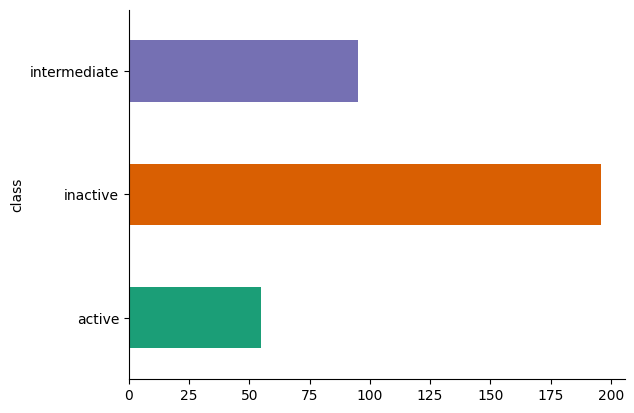

In [19]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
df_clean_smiles.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [20]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 50.4 MB/s eta 0:00:00


In [21]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

MW    LogP  NumHDonors  NumHAcceptors
0    239.274  2.9863         0.0            3.0
1    239.274  2.9863         0.0            3.0
2    239.274  2.9863         0.0            3.0
3    239.274  2.9863         0.0            3.0
4    239.274  2.9863         0.0            3.0
..       ...     ...         ...            ...
341  557.006  5.9698         0.0            9.0
342  587.032  5.9784         0.0           10.0
343  565.844  7.2594         0.0            7.0
344  514.944  6.0917         0.0            7.0
345  532.934  6.2308         0.0            7.0

[346 rows x 4 columns]

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

molecule_chembl_id                                   canonical_smiles  \
0                  MB1                 O=C(C1=CC=CC=C1OC)/C=C/C2=NC=CC=C2   
1                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
2                  MB3               O=C(C1=CC=CC(OC)=C1)/C=C/C2=CC=CN=C2   
3                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
4                  MB5               O=C(C1=CC=C(OC)C=C1)/C=C/C2=CC=CN=C2   
..                 ...                                                ...   
341              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
342              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
343              MB390  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
344              MB391  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
345              MB392  FC1=CC=C(C(/C=C/C2=CC=C(OCC3=CN(C4=CC=NC5=CC(C...   

     standard_value         class       MW    LogP  NumHDonors  NumHAcceptors  
0            2000.0  intermediate  239.274  2.9863         0.0            3.0  
1           17380.0      inactive  239.274  2.9863         0.0            3.0  
2            4090.0  intermediate  239.274  2.9863         0.0            3.0  
3           18640.0      inactive  239.274  2.9863         0.0            3.0  
4            4470.0  intermediate  239.274  2.9863         0.0            3.0  
..              ...           ...      ...     ...         ...            ...  
341         11700.0      inactive  557.006  5.9698         0.0            9.0  
342           300.0        active  587.032  5.9784         0.0           10.0  
343          1900.0  intermediate  565.844  7.2594         0.0            7.0  
344          1600.0  intermediate  514.944  6.0917         0.0            7.0  
345          2100.0  intermediate  532.934  6.2308         0.0            7.0  

[346 rows x 8 columns]

In [ ]:
df_combined.to_csv('chalcone_03_bioactivity_lipsk.csv')

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       346.000000
mean      33169.221243
std       68843.663429
min           7.460000
25%        3985.000000
50%       14450.000000
75%       35117.500000
max      600000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [ ]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

molecule_chembl_id                                   canonical_smiles  \
0                  MB1                 O=C(C1=CC=CC=C1OC)/C=C/C2=NC=CC=C2   
1                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
2                  MB3               O=C(C1=CC=CC(OC)=C1)/C=C/C2=CC=CN=C2   
3                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
4                  MB5               O=C(C1=CC=C(OC)C=C1)/C=C/C2=CC=CN=C2   
..                 ...                                                ...   
341              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
342              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
343              MB390  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
344              MB391  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
345              MB392  FC1=CC=C(C(/C=C/C2=CC=C(OCC3=CN(C4=CC=NC5=CC(C...   

            class       MW    LogP  NumHDonors  NumHAcceptors  \
0    intermediate  239.274  2.9863         0.0            3.0   
1        inactive  239.274  2.9863         0.0            3.0   
2    intermediate  239.274  2.9863         0.0            3.0   
3        inactive  239.274  2.9863         0.0            3.0   
4    intermediate  239.274  2.9863         0.0            3.0   
..            ...      ...     ...         ...            ...   
341      inactive  557.006  5.9698         0.0            9.0   
342        active  587.032  5.9784         0.0           10.0   
343  intermediate  565.844  7.2594         0.0            7.0   
344  intermediate  514.944  6.0917         0.0            7.0   
345  intermediate  532.934  6.2308         0.0            7.0   

     standard_value_norm  
0                 2000.0  
1                17380.0  
2                 4090.0  
3                18640.0  
4                 4470.0  
..                   ...  
341              11700.0  
342                300.0  
343               1900.0  
344               1600.0  
345               2100.0  

[346 rows x 8 columns]

In [ ]:
df_norm.standard_value_norm.describe()

count       346.000000
mean      33169.221243
std       68843.663429
min           7.460000
25%        3985.000000
50%       14450.000000
75%       35117.500000
max      600000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

molecule_chembl_id                                   canonical_smiles  \
0                  MB1                 O=C(C1=CC=CC=C1OC)/C=C/C2=NC=CC=C2   
1                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
2                  MB3               O=C(C1=CC=CC(OC)=C1)/C=C/C2=CC=CN=C2   
3                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
4                  MB5               O=C(C1=CC=C(OC)C=C1)/C=C/C2=CC=CN=C2   
..                 ...                                                ...   
341              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
342              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
343              MB390  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
344              MB391  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
345              MB392  FC1=CC=C(C(/C=C/C2=CC=C(OCC3=CN(C4=CC=NC5=CC(C...   

            class       MW    LogP  NumHDonors  NumHAcceptors     pIC50  
0    intermediate  239.274  2.9863         0.0            3.0  5.698970  
1        inactive  239.274  2.9863         0.0            3.0  4.759950  
2    intermediate  239.274  2.9863         0.0            3.0  5.388277  
3        inactive  239.274  2.9863         0.0            3.0  4.729554  
4    intermediate  239.274  2.9863         0.0            3.0  5.349692  
..            ...      ...     ...         ...            ...       ...  
341      inactive  557.006  5.9698         0.0            9.0  4.931814  
342        active  587.032  5.9784         0.0           10.0  6.522879  
343  intermediate  565.844  7.2594         0.0            7.0  5.721246  
344  intermediate  514.944  6.0917         0.0            7.0  5.795880  
345  intermediate  532.934  6.2308         0.0            7.0  5.677781  

[346 rows x 8 columns]

In [ ]:
df_final.pIC50.describe()

count    346.000000
mean       5.118907
std        1.014426
min        3.221849
25%        4.454536
50%        4.840135
75%        5.399573
max        8.127261
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('chalcone_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
#Removing the 'intermediate' bioactivity class
df_2class = df_final[df_final['class']  != 'intermediate']
df_2class

molecule_chembl_id                                   canonical_smiles  \
1                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
3                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
6                  MB7  OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OCC3=CN(C4=...   
9                 MB10  OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OCC3=CN(C4=...   
12                MB13  OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OC)C(OCC3=C...   
..                 ...                                                ...   
334              MB381  O=C(C1=CC=C(OC)C=C1OC)/C=C/C2=CC=C(OCC3=CN(C4=...   
335              MB382  O=C(C1=CC=C(OC)C(OC)=C1OC)/C=C/C2=CC=C(OCC3=CN...   
336              MB383  O=C1NC(C(C)=CN1C2OC(CO)C(N3N=NC(COC4=CC=C(C(/C...   
341              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
342              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   

        class       MW     LogP  NumHDonors  NumHAcceptors     pIC50  
1    inactive  239.274  2.98630         0.0            3.0  4.759950  
3    inactive  239.274  2.98630         0.0            3.0  4.729554  
6    inactive  539.947  5.26630         1.0            9.0  4.935168  
9    inactive  521.957  5.12720         1.0            9.0  4.886725  
12   inactive  539.947  5.26630         1.0            9.0  4.856361  
..        ...      ...      ...         ...            ...       ...  
334    active  557.006  5.96980         0.0            9.0  7.154902  
335    active  587.032  5.97840         0.0           10.0  6.397940  
336  inactive  619.631  2.45852         2.0           13.0  4.928118  
341  inactive  557.006  5.96980         0.0            9.0  4.931814  
342    active  587.032  5.97840         0.0           10.0  6.522879  

[251 rows x 8 columns]

Let's write this to CSV file.

In [ ]:
df_2class.to_csv('chalcone_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [ ]:
#Statistical
mean_MW = df_2class.groupby('class')["MW"].mean()
SD_MW = df_2class.groupby('class')["MW"].std()
mean_LogP = df_2class.groupby('class')["LogP"].mean()
SD_LogP = df_2class.groupby('class')["LogP"].std()
mean_NumHDonors = df_2class.groupby('class')["NumHDonors"].mean()
SD_NumHDonors = df_2class.groupby('class')["NumHDonors"].std()
mean_NumHAcceptors = df_2class.groupby('class')["NumHAcceptors"].mean()
SD_NumHAcceptors = df_2class.groupby('class')["NumHAcceptors"].std()

In [ ]:
total = [mean_MW,SD_MW,mean_LogP,SD_LogP,mean_NumHDonors,SD_NumHDonors,mean_NumHAcceptors,SD_NumHAcceptors]
label=['meanMWac', 'meanMWin','SDMWac', 'SDMWin',
     'meanLogPac', 'meanLogPin','SDLogPac','SDLogPin',
     'meanNumHDonorsac','meanNumHDonorsin','SDNumHDonorsac','SDNumHDonorsin',
    'meanNumHAcceptorsac', 'meanNumHAcceptorsin','SDNumHAcceptorsac','SDNumHAcceptorsin']

In [ ]:
statistic_Ro5 = pd.concat(total, axis=0)
Ro5 = pd.DataFrame(statistic_Ro5, columns=["stat"])
Ro5['label']= label
Ro5

stat                label
class                                    
active    538.167055             meanMWac
inactive  346.847704             meanMWin
active     56.340874               SDMWac
inactive   97.409202               SDMWin
active      6.978626           meanLogPac
inactive    4.537789           meanLogPin
active      1.283293             SDLogPac
inactive    1.087044             SDLogPin
active      1.636364     meanNumHDonorsac
inactive    0.413265     meanNumHDonorsin
active      0.778499       SDNumHDonorsac
inactive    0.614047       SDNumHDonorsin
active      6.000000  meanNumHAcceptorsac
inactive    4.112245  meanNumHAcceptorsin
active      1.387777    SDNumHAcceptorsac
inactive    2.268548    SDNumHAcceptorsin

In [ ]:
Ro5.to_csv("Ro5_stat.csv",index=True)

### **Import library**

In [ ]:
pip install statannotations

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

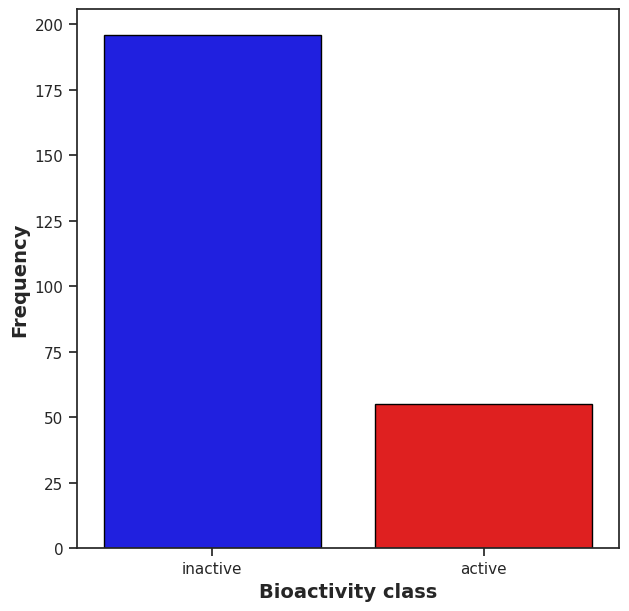

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette and figure size
plt.figure(figsize=(7, 7))

# Assign `hue='class'` to resolve the warning
sns.countplot(x='class', data=df_2class, edgecolor='black',
              hue='class', palette=['blue', 'red'], legend=False)

# Customize axis labels
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Save the plot
plt.savefig('plot_bioactivity_class.tiff', bbox_inches='tight', pad_inches=0.1)


### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

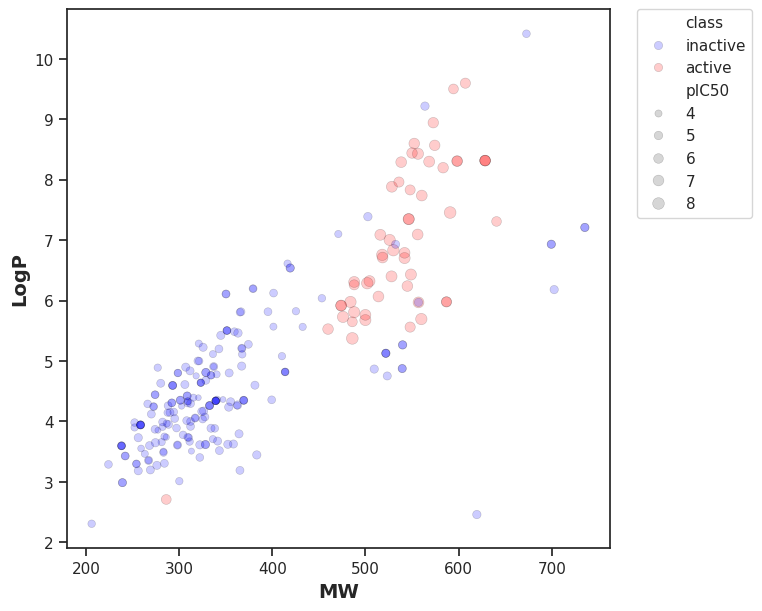

In [ ]:
plt.figure(figsize=(7, 7))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.2, palette=['blue', 'red'])
sns.set_style("whitegrid", {"ytick.major.size": 100,"xtick.major.size": 2, 'grid.linestyle': 'solid'})

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('plot_MW_vs_LogP.tiff', bbox_inches='tight', pad_inches=0.1)

### **Box plots**

#### **pIC50 value**

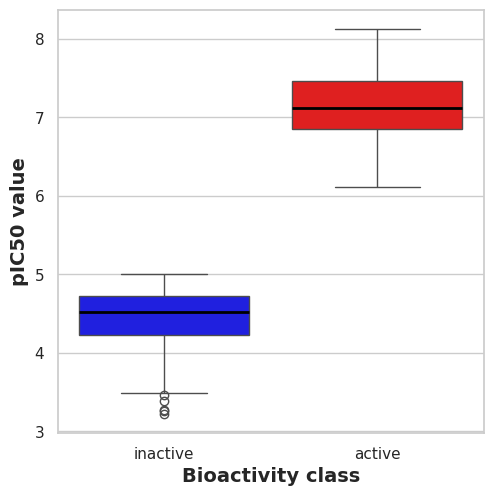

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='pIC50', data=df_2class, medianprops=dict(color="black", alpha=1, linewidth=2), hue='class', palette=['blue', 'red'], legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_IC50.tiff')
plt.savefig('plot_ic50.pdf')

####  Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

Descriptor  Statistics             p  alpha  \
0      pIC50     10780.0  9.590094e-30   0.05   

                       Interpretation  
0  Different distribution (reject H0)

In [ ]:
pip install statsmodels

In [ ]:
from statannotations.Annotator import Annotator

#### MW

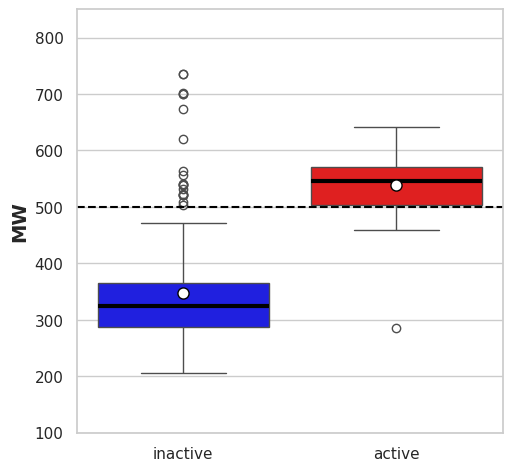

In [ ]:
plt.figure(figsize=(5.5, 5.5))

ax = sns.boxplot(x='class', y='MW', data=df_2class, showmeans=True,  meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": 8},
                 medianprops=dict(color="black", alpha=1, linewidth=3),
                 hue='class', palette=['blue', 'red'], legend=False)
ax.axhline(500, ls='--',c = 'black')
ax.set(ylim=(100, 850))
ax.set(xlabel=None)

plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.tiff')

In [ ]:
mannwhitney('MW')

Descriptor  Statistics             p  alpha  \
0         MW      9962.5  7.300678e-22   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### LogP

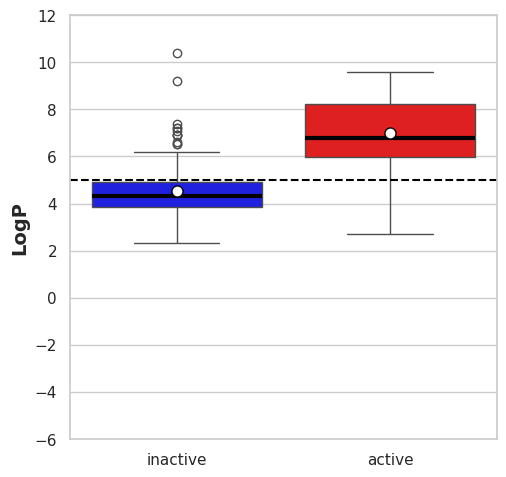

In [ ]:
plt.figure(figsize=(5.5, 5.5))

ax = sns.boxplot(x='class', y='LogP', data=df_2class,
                 showmeans=True,
                 meanprops={"marker": "o", "markerfacecolor": "white",
                            "markeredgecolor": "black", "markersize": 8},
                 medianprops=dict(color="black", alpha=1, linewidth=3),
                 hue='class', palette=['blue', 'red'], legend=False)

ax.axhline(5, ls='--',c = 'black')
ax.set(ylim=(-6, 12))
ax.set(xlabel=None)

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.tiff')

In [ ]:
mannwhitney('LogP')

Descriptor  Statistics             p  alpha  \
0       LogP     10030.0  1.822465e-22   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### NumHDonor

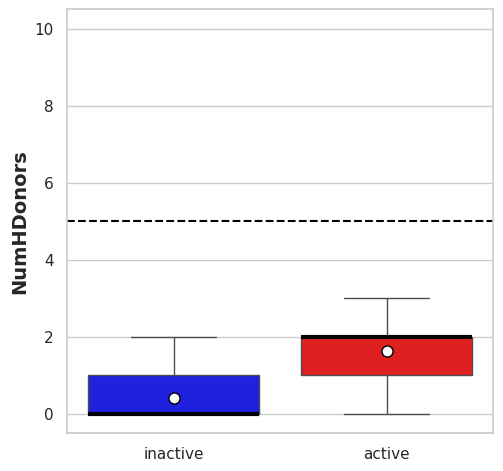

In [ ]:
plt.figure(figsize=(5.5, 5.5))

ax = sns.boxplot(x='class', y='NumHDonors', data=df_2class,
                 showmeans=True,
                 meanprops={"marker": "o", "markerfacecolor": "white",
                            "markeredgecolor": "black", "markersize": 8},
                 medianprops=dict(color="black", alpha=1, linewidth=3),
                 hue='class', palette=['blue', 'red'])

ax.axhline(5, ls='--', c='black')  # Add a horizontal line
ax.set(ylim=(-0.5, 10.5))          # Set the y-axis limits
ax.set(xlabel=None)                # Remove the x-axis label

plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.tiff')


In [ ]:
mannwhitney('NumHDonors')

Descriptor  Statistics             p  alpha  \
0  NumHDonors      9317.5  9.942229e-20   0.05   

                       Interpretation  
0  Different distribution (reject H0)

#### NumHAcceptors

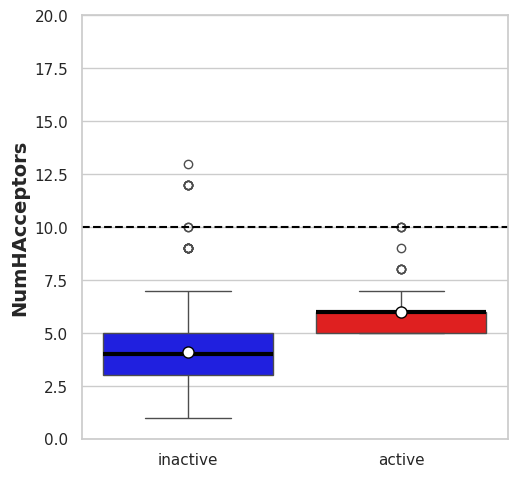

In [ ]:
plt.figure(figsize=(5.5, 5.5))

ax = sns.boxplot(x='class', y='NumHAcceptors', data=df_2class,
                 showmeans=True,
                 meanprops={"marker": "o", "markerfacecolor": "white",
                            "markeredgecolor": "black", "markersize": 8},
                 medianprops=dict(color="black", alpha=1, linewidth=3),
                 hue='class', palette=['blue', 'red'])

# Add horizontal line and customize axes
ax.axhline(10, ls='--', c='black')  # Horizontal line at y=10
ax.set(ylim=(0, 20))                # Set y-axis range
ax.set(xlabel=None)                 # Remove x-axis label

# Customize y-axis label
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

# Save the figure
plt.savefig('plot_NumHAcceptors.tiff')


In [ ]:
mannwhitney('NumHAcceptors')

Descriptor  Statistics             p  alpha  \
0  NumHAcceptors      9028.5  8.342247e-15   0.05   

                       Interpretation  
0  Different distribution (reject H0)

## **Zip files**

In [ ]:
!ls

chacone_00_bioactivity_data_raw.csv		    plot_bioactivity_class.tiff
chalcone_01_bioactivity_IC50_data_raw.csv	    plot_ic50.pdf
chalcone_02_bioactivity_IC50_data_preprocessed.csv  plot_IC50.tiff
chalcone_03_bioactivity_IC50_data_curated.csv	    plot_LogP.tiff
chalcone_03_bioactivity_lipsk.csv		    plot_MW.tiff
chalcone_04_bioactivity_data_3class_pIC50.csv	    plot_MW_vs_LogP.tiff
chalcone_05_bioactivity_data_2class_pIC50.csv	    plot_NumHAcceptors.tiff
mannwhitneyu_LogP.csv				    plot_NumHDonors.tiff
mannwhitneyu_MW.csv				    raw1.csv
mannwhitneyu_NumHAcceptors.csv			    Ro5_stat.csv
mannwhitneyu_NumHDonors.csv			    sample_data
mannwhitneyu_pIC50.csv


In [ ]:
!zip -r results.zip . -i *.csv *.tiff

  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: chalcone_02_bioactivity_IC50_data_preprocessed.csv (deflated 83%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: chalcone_03_bioactivity_lipsk.csv (deflated 80%)
  adding: plot_LogP.tiff (deflated 99%)
  adding: chalcone_01_bioactivity_IC50_data_raw.csv (deflated 83%)
  adding: plot_MW_vs_LogP.tiff (deflated 98%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: chalcone_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: chalcone_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_NumHAcceptors.tiff (deflated 99%)
  adding: chalcone_03_bioactivity_IC50_data_curated.csv (deflated 85%)
  adding: plot_IC50.tiff (deflated 99%)
  adding: plot_NumHDonors.tiff (deflated 99%)
  adding: raw1.csv (deflated 84%)
  adding: Ro5_stat.csv (deflated 57%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_bioactivity_class.tiff (deflat

### 03_Molecular descriptors

# **Calculating molecular fingerprints using padelpy**

# **Install padelpy**

In [ ]:
! pip install padelpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 85.5 MB/s eta 0:00:00


# **Prepare fingerprint XML**

 **Download fingerprint XML files**

In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2025-06-19 14:49:14--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2025-06-19 14:49:14--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2025-06-19 14:49:14 (46.4 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

### **List and sort fingerprint XML files**

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

### **Create a dictionary**

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
fp['AtomPairs2D']

'AtomPairs2DFingerprinter.xml'

# **Load HCV dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/chalcone_05_bioactivity_data_2class_pIC50.csv')
df.head(2)

Unnamed: 0 molecule_chembl_id                      canonical_smiles  \
0           1                MB2    O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
1           3                MB4  O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   

      class       MW    LogP  NumHDonors  NumHAcceptors     pIC50  
0  inactive  239.274  2.9863         0.0            3.0  4.759950  
1  inactive  239.274  2.9863         0.0            3.0  4.729554

In [ ]:
df.tail(2)

Unnamed: 0 molecule_chembl_id  \
249         341              MB388   
250         342              MB389   

                                      canonical_smiles     class       MW  \
249  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...  inactive  557.006   
250  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...    active  587.032   

       LogP  NumHDonors  NumHAcceptors     pIC50  
249  5.9698         0.0            9.0  4.931814  
250  5.9784         0.0           10.0  6.522879

# **Prepare data subset as input to PaDEL**

In [ ]:
df2 = pd.concat( [df['canonical_smiles'],df['molecule_chembl_id']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

canonical_smiles molecule_chembl_id
0                   O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2                MB2
1                 O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2                MB4
2    OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OCC3=CN(C4=...                MB7
3    OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OCC3=CN(C4=...               MB10
4    OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OC)C(OCC3=C...               MB13
..                                                 ...                ...
246  O=C(C1=CC=C(OC)C=C1OC)/C=C/C2=CC=C(OCC3=CN(C4=...              MB381
247  O=C(C1=CC=C(OC)C(OC)=C1OC)/C=C/C2=CC=C(OCC3=CN...              MB382
248  O=C1NC(C(C)=CN1C2OC(CO)C(N3N=NC(COC4=CC=C(C(/C...              MB383
249  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...              MB388
250  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...              MB389

[251 rows x 2 columns]

# **Calculate descriptors**

There are 12 fingerprint types in PaDEL. To calculate all 12, make sure to make adjustments to the ***descriptortypes*** input argument to any of the ones in the ***fp*** dictionary variable as shown above, e.g. *SubstructureFingerprintCount.xml*

In [ ]:
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
fp['AtomPairs2DCount']

'AtomPairs2DFingerprintCount.xml'

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'SubstructureCount'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #SubstructureCount.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'SubstructureCount.csv'
                #descriptortypes='SubstructureFingerprintCount.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  SubFPC1  SubFPC2  SubFPC3  SubFPC4  SubFPC5  SubFPC6  SubFPC7  \
0      MB2      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
1      MB4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
2      MB7      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
3     MB10      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4     MB13      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
..     ...      ...      ...      ...      ...      ...      ...      ...   
246  MB381      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
247  MB382      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
248  MB383      1.0      1.0      0.0      0.0      1.0      0.0      0.0   
249  MB388      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
250  MB389      0.0      0.0      0.0      0.0      1.0      0.0      0.0   

     SubFPC8  SubFPC9  ...  SubFPC298  SubFPC299  SubFPC300  SubFPC301  \
0        0.0      0.0  ...        0.0        0.0        3.0        3.0   
1        0.0      0.0  ...        0.0        0.0        3.0        3.0   
2        0.0      0.0  ...        0.0        0.0        8.0        8.0   
3        0.0      0.0  ...        0.0        0.0        8.0        8.0   
4        0.0      0.0  ...        0.0        0.0        8.0        8.0   
..       ...      ...  ...        ...        ...        ...        ...   
246      0.0      0.0  ...        0.0        0.0        7.0        7.0   
247      0.0      0.0  ...        0.0        0.0        8.0        8.0   
248      0.0      0.0  ...        0.0        0.0       20.0       20.0   
249      0.0      0.0  ...        0.0        0.0        7.0        7.0   
250      0.0      0.0  ...        0.0        0.0        8.0        8.0   

     SubFPC302  SubFPC303  SubFPC304  SubFPC305  SubFPC306  SubFPC307  
0          4.0        1.0        0.0        0.0        0.0       14.0  
1          4.0        1.0        0.0        0.0        0.0       14.0  
2          9.0        1.0        0.0        0.0        0.0       24.0  
3          9.0        1.0        0.0        0.0        0.0       24.0  
4          9.0        1.0        0.0        0.0        0.0       24.0  
..         ...        ...        ...        ...        ...        ...  
246        9.0        1.0        0.0        0.0        0.0       27.0  
247       10.0        1.0        0.0        0.0        0.0       27.0  
248       12.0        2.0        0.0        0.0        0.0       27.0  
249        9.0        1.0        0.0        0.0        0.0       27.0  
250       10.0        1.0        0.0        0.0        0.0       27.0  

[251 rows x 308 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'AtomPairs2D'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #AtomPairs2D.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'AtomPairs2D.csv'
                #descriptortypes='AtomPairs2DFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  AD2D1  AD2D2  AD2D3  AD2D4  AD2D5  AD2D6  AD2D7  AD2D8  AD2D9  \
0      MB2      1      1      1      0      0      0      0      0      0   
1      MB4      1      1      1      0      0      0      0      0      0   
2      MB7      1      1      1      0      0      1      1      0      0   
3     MB10      1      1      1      0      0      0      1      0      0   
4     MB13      1      1      1      0      0      1      1      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
246  MB381      1      1      1      0      0      0      1      0      0   
247  MB382      1      1      1      0      0      0      1      0      0   
248  MB383      1      1      1      0      0      0      0      0      0   
249  MB388      1      1      1      0      0      0      1      0      0   
250  MB389      1      1      1      0      0      0      1      0      0   

     ...  AD2D771  AD2D772  AD2D773  AD2D774  AD2D775  AD2D776  AD2D777  \
0    ...        0        0        0        0        0        0        0   
1    ...        0        0        0        0        0        0        0   
2    ...        0        0        0        0        0        0        0   
3    ...        0        0        0        0        0        0        0   
4    ...        0        0        0        0        0        0        0   
..   ...      ...      ...      ...      ...      ...      ...      ...   
246  ...        0        0        0        0        0        0        0   
247  ...        0        0        0        0        0        0        0   
248  ...        0        0        0        0        0        0        0   
249  ...        0        0        0        0        0        0        0   
250  ...        0        0        0        0        0        0        0   

     AD2D778  AD2D779  AD2D780  
0          0        0        0  
1          0        0        0  
2          0        0        0  
3          0        0        0  
4          0        0        0  
..       ...      ...      ...  
246        0        0        0  
247        0        0        0  
248        0        0        0  
249        0        0        0  
250        0        0        0  

[251 rows x 781 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'EState'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #EState.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'EState.csv'
                #descriptortypes='EStateFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  EStateFP1  EStateFP2  EStateFP3  EStateFP4  EStateFP5  EStateFP6  \
0      MB2          0          0          0          0          0          0   
1      MB4          0          0          0          0          0          0   
2      MB7          0          0          0          0          0          0   
3     MB10          0          0          0          0          0          0   
4     MB13          0          0          0          0          0          0   
..     ...        ...        ...        ...        ...        ...        ...   
246  MB381          0          0          0          0          0          0   
247  MB382          0          0          0          0          0          0   
248  MB383          0          0          0          0          0          0   
249  MB388          0          0          0          0          0          0   
250  MB389          0          0          0          0          0          0   

     EStateFP7  EStateFP8  EStateFP9  ...  EStateFP70  EStateFP71  EStateFP72  \
0            1          0          0  ...           0           0           0   
1            1          0          0  ...           0           0           0   
2            1          0          1  ...           0           0           0   
3            1          0          1  ...           0           0           0   
4            1          0          1  ...           0           0           0   
..         ...        ...        ...  ...         ...         ...         ...   
246          1          0          1  ...           0           0           0   
247          1          0          1  ...           0           0           0   
248          1          0          1  ...           0           0           0   
249          1          0          1  ...           0           0           0   
250          1          0          1  ...           0           0           0   

     EStateFP73  EStateFP74  EStateFP75  EStateFP76  EStateFP77  EStateFP78  \
0             0           0           0           0           0           0   
1             0           0           0           0           0           0   
2             0           0           0           0           0           0   
3             0           0           0           0           0           0   
4             0           0           0           0           0           0   
..          ...         ...         ...         ...         ...         ...   
246           0           0           0           0           0           0   
247           0           0           0           0           0           0   
248           0           0           0           0           0           0   
249           0           0           0           0           0           0   
250           0           0           0           0           0           0   

     EStateFP79  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
246           0  
247           0  
248           0  
249           0  
250           0  

[251 rows x 80 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'CDKextended'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #CDKextended.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'CDKextended.csv'
                #descriptortypes='ExtendedFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  ExtFP1  ExtFP2  ExtFP3  ExtFP4  ExtFP5  ExtFP6  ExtFP7  ExtFP8  \
0      MB2       0       0       0       0       0       0       0       0   
1      MB4       0       0       0       0       0       0       0       0   
2      MB7       0       0       0       0       1       1       0       0   
3     MB10       0       0       0       0       1       1       0       0   
4     MB13       0       0       0       0       1       1       0       1   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
246  MB381       1       0       0       0       1       1       0       1   
247  MB382       1       0       0       0       1       1       0       1   
248  MB383       0       1       1       1       1       1       1       0   
249  MB388       1       0       0       0       1       1       0       1   
250  MB389       1       0       0       0       1       1       0       1   

     ExtFP9  ...  ExtFP1015  ExtFP1016  ExtFP1017  ExtFP1018  ExtFP1019  \
0         0  ...          0          0          0          0          0   
1         0  ...          0          0          0          0          0   
2         0  ...          0          0          0          0          0   
3         0  ...          0          0          0          0          0   
4         0  ...          0          0          0          0          0   
..      ...  ...        ...        ...        ...        ...        ...   
246       0  ...          1          0          0          0          0   
247       0  ...          1          0          0          0          0   
248       0  ...          0          0          0          0          0   
249       0  ...          1          0          0          0          0   
250       0  ...          1          0          0          0          0   

     ExtFP1020  ExtFP1021  ExtFP1022  ExtFP1023  ExtFP1024  
0            0          0          0          0          0  
1            0          0          0          0          0  
2            0          0          0          0          0  
3            0          0          0          0          0  
4            0          0          0          0          0  
..         ...        ...        ...        ...        ...  
246          0          0          0          0          0  
247          0          0          0          0          0  
248          0          0          0          0          0  
249          0          0          0          0          0  
250          0          0          0          0          0  

[251 rows x 1025 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'CDK'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #CDK.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'CDK.csv'
                #descriptortypes='Fingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  ...  FP1015  FP1016  \
0      MB2    0    0    0    0    0    0    1    0    0  ...       1       0   
1      MB4    0    0    0    0    1    0    0    0    0  ...       1       1   
2      MB7    0    0    0    1    1    0    0    0    0  ...       1       1   
3     MB10    0    0    0    1    1    0    0    0    0  ...       1       1   
4     MB13    0    0    0    0    1    0    0    0    0  ...       1       1   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...     ...   
246  MB381    1    0    1    0    1    0    0    0    0  ...       1       1   
247  MB382    1    0    1    0    1    0    0    0    0  ...       1       1   
248  MB383    0    0    0    0    1    0    0    1    0  ...       1       1   
249  MB388    1    0    1    0    1    0    0    0    0  ...       1       1   
250  MB389    1    0    1    0    1    0    0    0    0  ...       1       1   

     FP1017  FP1018  FP1019  FP1020  FP1021  FP1022  FP1023  FP1024  
0         0       0       0       1       0       0       0       0  
1         0       0       0       0       0       0       0       0  
2         0       0       0       0       0       0       1       0  
3         0       0       0       0       0       0       1       0  
4         0       0       0       0       0       0       1       1  
..      ...     ...     ...     ...     ...     ...     ...     ...  
246       0       0       0       0       0       0       1       0  
247       0       0       0       1       0       0       1       0  
248       0       0       1       1       0       0       1       0  
249       0       0       0       1       0       0       0       0  
250       0       0       0       1       0       0       1       0  

[251 rows x 1025 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'CDKgraphonly'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #CDKgraphonly.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'CDKgraphonly.csv'
                #descriptortypes='GraphOnlyFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  GraphFP1  GraphFP2  GraphFP3  GraphFP4  GraphFP5  GraphFP6  \
0      MB2         0         0         0         0         0         0   
1      MB4         0         0         0         0         0         0   
2      MB7         0         0         1         1         0         0   
3     MB10         0         0         1         1         0         0   
4     MB13         0         0         1         0         0         0   
..     ...       ...       ...       ...       ...       ...       ...   
246  MB381         0         0         1         0         0         0   
247  MB382         0         0         1         0         0         0   
248  MB383         0         0         1         0         0         0   
249  MB388         0         0         1         0         0         0   
250  MB389         0         0         1         0         0         0   

     GraphFP7  GraphFP8  GraphFP9  ...  GraphFP1015  GraphFP1016  GraphFP1017  \
0           0         0         0  ...            0            0            0   
1           0         0         0  ...            0            0            0   
2           0         0         0  ...            0            1            0   
3           0         0         0  ...            0            1            0   
4           0         1         1  ...            1            1            0   
..        ...       ...       ...  ...          ...          ...          ...   
246         0         0         1  ...            1            1            0   
247         0         0         1  ...            1            1            0   
248         0         0         0  ...            0            0            0   
249         0         0         1  ...            1            1            0   
250         0         0         1  ...            1            1            0   

     GraphFP1018  GraphFP1019  GraphFP1020  GraphFP1021  GraphFP1022  \
0              0            0            0            0            0   
1              0            0            0            0            0   
2              0            0            0            0            0   
3              0            0            0            0            0   
4              0            0            0            0            0   
..           ...          ...          ...          ...          ...   
246            0            0            0            0            0   
247            0            0            0            0            0   
248            0            0            0            0            0   
249            0            0            0            0            0   
250            0            0            0            0            0   

     GraphFP1023  GraphFP1024  
0              0            0  
1              0            0  
2              0            0  
3              0            0  
4              0            0  
..           ...          ...  
246            0            0  
247            0            0  
248            0            0  
249            0            0  
250            0            0  

[251 rows x 1025 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'KlekotaRoth'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #KlekotaRoth.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'KlekotaRoth.csv'
                #descriptortypes='KlekotaRothFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  KRFP9  \
0      MB2      0      0      0      0      0      0      0      0      0   
1      MB4      0      0      0      0      0      0      0      0      0   
2      MB7      0      0      0      0      0      0      0      0      0   
3     MB10      0      0      0      0      0      0      0      0      0   
4     MB13      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
246  MB381      0      0      0      0      0      0      0      0      0   
247  MB382      0      0      0      0      0      0      0      0      0   
248  MB383      1      1      0      0      0      0      0      0      0   
249  MB388      0      0      0      0      0      0      0      0      0   
250  MB389      0      0      0      0      0      0      0      0      0   

     ...  KRFP4851  KRFP4852  KRFP4853  KRFP4854  KRFP4855  KRFP4856  \
0    ...         0         0         0         0         0         0   
1    ...         0         0         0         0         0         0   
2    ...         0         0         0         0         0         0   
3    ...         0         0         0         0         0         0   
4    ...         0         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
246  ...         0         0         0         0         0         0   
247  ...         0         0         0         0         0         0   
248  ...         0         0         0         0         0         0   
249  ...         0         0         0         0         0         0   
250  ...         0         0         0         0         0         0   

     KRFP4857  KRFP4858  KRFP4859  KRFP4860  
0           0         0         0         0  
1           0         0         0         0  
2           0         0         0         0  
3           0         0         0         0  
4           0         0         0         0  
..        ...       ...       ...       ...  
246         0         0         0         0  
247         0         0         0         0  
248         0         0         0         0  
249         0         0         0         0  
250         0         0         0         0  

[251 rows x 4861 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'KlekotaRothCount'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #KlekotaRothCount.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'KlekotaRothCount.csv'
                #descriptortypes='KlekotaRothFingerprintCount.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'MACCS'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #MACCS.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'MACCS.csv'
                #descriptortypes='MACCSFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  \
0      MB2         0         0         0         0         0         0   
1      MB4         0         0         0         0         0         0   
2      MB7         0         0         0         0         0         0   
3     MB10         0         0         0         0         0         0   
4     MB13         0         0         0         0         0         0   
..     ...       ...       ...       ...       ...       ...       ...   
246  MB381         0         0         0         0         0         0   
247  MB382         0         0         0         0         0         0   
248  MB383         0         0         0         0         0         0   
249  MB388         0         0         0         0         0         0   
250  MB389         0         0         0         0         0         0   

     MACCSFP7  MACCSFP8  MACCSFP9  ...  MACCSFP157  MACCSFP158  MACCSFP159  \
0           0         0         0  ...           1           0           1   
1           0         0         0  ...           1           0           1   
2           0         0         0  ...           1           0           1   
3           0         0         0  ...           1           0           1   
4           0         0         0  ...           1           0           1   
..        ...       ...       ...  ...         ...         ...         ...   
246         0         0         0  ...           1           0           1   
247         0         0         0  ...           1           0           1   
248         0         0         0  ...           1           1           1   
249         0         0         0  ...           1           0           1   
250         0         0         0  ...           1           0           1   

     MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  MACCSFP165  \
0             1           1           1           1           1           1   
1             1           1           1           1           1           1   
2             1           1           1           1           1           1   
3             1           1           1           1           1           1   
4             1           1           1           1           1           1   
..          ...         ...         ...         ...         ...         ...   
246           1           1           1           1           1           1   
247           1           1           1           1           1           1   
248           1           1           1           1           1           1   
249           1           1           1           1           1           1   
250           1           1           1           1           1           1   

     MACCSFP166  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
246           0  
247           0  
248           0  
249           0  
250           0  

[251 rows x 167 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #PubChem.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'PubChem.csv'
                #descriptortypes='PubchemFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0      MB2           1           1           0           0           0   
1      MB4           1           1           0           0           0   
2      MB7           1           1           1           0           0   
3     MB10           1           1           1           0           0   
4     MB13           1           1           1           0           0   
..     ...         ...         ...         ...         ...         ...   
246  MB381           1           1           1           0           0   
247  MB382           1           1           1           0           0   
248  MB383           0           0           0           0           0   
249  MB388           1           1           1           0           0   
250  MB389           1           1           1           0           0   

     PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP871  \
0             0           0           0           0  ...             0   
1             0           0           0           0  ...             0   
2             0           0           0           0  ...             0   
3             0           0           0           0  ...             0   
4             0           0           0           0  ...             0   
..          ...         ...         ...         ...  ...           ...   
246           0           0           0           0  ...             0   
247           0           0           0           0  ...             0   
248           0           0           0           0  ...             0   
249           0           0           0           0  ...             0   
250           0           0           0           0  ...             0   

     PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0               0             0             0             0             0   
1               0             0             0             0             0   
2               0             0             0             0             0   
3               0             0             0             0             0   
4               0             0             0             0             0   
..            ...           ...           ...           ...           ...   
246             0             0             0             0             0   
247             0             0             0             0             0   
248             0             0             0             0             0   
249             0             0             0             0             0   
250             0             0             0             0             0   

     PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0               0             0             0             0  
1               0             0             0             0  
2               0             0             0             0  
3               0             0             0             0  
4               0             0             0             0  
..            ...           ...           ...           ...  
246             0             0             0             0  
247             0             0             0             0  
248             0             0             0             0  
249             0             0             0             0  
250             0             0             0             0  

[251 rows x 882 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprinter.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  SubFP1  SubFP2  SubFP3  SubFP4  SubFP5  SubFP6  SubFP7  SubFP8  \
0      MB2       0       0       0       0       1       0       0       0   
1      MB4       0       0       0       0       1       0       0       0   
2      MB7       0       0       0       0       1       0       0       0   
3     MB10       0       0       0       0       1       0       0       0   
4     MB13       0       0       0       0       1       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
246  MB381       0       0       0       0       1       0       0       0   
247  MB382       0       0       0       0       1       0       0       0   
248  MB383       1       1       0       0       1       0       0       0   
249  MB388       0       0       0       0       1       0       0       0   
250  MB389       0       0       0       0       1       0       0       0   

     SubFP9  ...  SubFP298  SubFP299  SubFP300  SubFP301  SubFP302  SubFP303  \
0         0  ...         0         0         1         1         1         1   
1         0  ...         0         0         1         1         1         1   
2         0  ...         0         0         1         1         1         1   
3         0  ...         0         0         1         1         1         1   
4         0  ...         0         0         1         1         1         1   
..      ...  ...       ...       ...       ...       ...       ...       ...   
246       0  ...         0         0         1         1         1         1   
247       0  ...         0         0         1         1         1         1   
248       0  ...         0         0         1         1         1         1   
249       0  ...         0         0         1         1         1         1   
250       0  ...         0         0         1         1         1         1   

     SubFP304  SubFP305  SubFP306  SubFP307  
0           0         0         0         1  
1           0         0         0         1  
2           0         0         0         1  
3           0         0         0         1  
4           0         0         0         1  
..        ...       ...       ...       ...  
246         0         0         0         1  
247         0         0         0         1  
248         0         0         0         1  
249         0         0         0         1  
250         0         0         0         1  

[251 rows x 308 columns]

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'AtomPairs2DCount'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #AtomPairs2DCount.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file, #'AtomPairs2DCount.csv'
                #descriptortypes='AtomPairs2DFingerprintCount.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

Name  APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  APC2D1_C_P  \
0      MB2        14.0         2.0         3.0         0.0         0.0   
1      MB4        14.0         2.0         3.0         0.0         0.0   
2      MB7        24.0         3.0        10.0         0.0         0.0   
3     MB10        24.0         3.0        10.0         0.0         0.0   
4     MB13        24.0         3.0        10.0         0.0         0.0   
..     ...         ...         ...         ...         ...         ...   
246  MB381        27.0         5.0         9.0         0.0         0.0   
247  MB382        27.0         5.0        11.0         0.0         0.0   
248  MB383        25.0         8.0        14.0         0.0         0.0   
249  MB388        27.0         5.0         9.0         0.0         0.0   
250  MB389        27.0         5.0        11.0         0.0         0.0   

     APC2D1_C_F  APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  ...  APC2D10_I_I  \
0           0.0          0.0          0.0         0.0  ...          0.0   
1           0.0          0.0          0.0         0.0  ...          0.0   
2           1.0          1.0          0.0         0.0  ...          0.0   
3           0.0          1.0          0.0         0.0  ...          0.0   
4           1.0          1.0          0.0         0.0  ...          0.0   
..          ...          ...          ...         ...  ...          ...   
246         0.0          1.0          0.0         0.0  ...          0.0   
247         0.0          1.0          0.0         0.0  ...          0.0   
248         0.0          0.0          0.0         0.0  ...          0.0   
249         0.0          1.0          0.0         0.0  ...          0.0   
250         0.0          1.0          0.0         0.0  ...          0.0   

     APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  APC2D10_B_Si  \
0            0.0           0.0          0.0          0.0           0.0   
1            0.0           0.0          0.0          0.0           0.0   
2            0.0           0.0          0.0          0.0           0.0   
3            0.0           0.0          0.0          0.0           0.0   
4            0.0           0.0          0.0          0.0           0.0   
..           ...           ...          ...          ...           ...   
246          0.0           0.0          0.0          0.0           0.0   
247          0.0           0.0          0.0          0.0           0.0   
248          0.0           0.0          0.0          0.0           0.0   
249          0.0           0.0          0.0          0.0           0.0   
250          0.0           0.0          0.0          0.0           0.0   

     APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
0            0.0            0.0           0.0          0.0  
1            0.0            0.0           0.0          0.0  
2            0.0            0.0           0.0          0.0  
3            0.0            0.0           0.0          0.0  
4            0.0            0.0           0.0          0.0  
..           ...            ...           ...          ...  
246          0.0            0.0           0.0          0.0  
247          0.0            0.0           0.0          0.0  
248          0.0            0.0           0.0          0.0  
249          0.0            0.0           0.0          0.0  
250          0.0            0.0           0.0          0.0  

[251 rows x 781 columns]

In [ ]:
! ls

AtomPairs2DCount.csv
AtomPairs2D.csv
CDK.csv
CDKextended.csv
CDKgraphonly.csv
chacone_00_bioactivity_data_raw.csv
chalcone_01_bioactivity_IC50_data_raw.csv
chalcone_02_bioactivity_IC50_data_preprocessed.csv
chalcone_03_bioactivity_IC50_data_curated.csv
chalcone_03_bioactivity_lipsk.csv
chalcone_04_bioactivity_data_3class_pIC50.csv
chalcone_05_bioactivity_data_2class_pIC50.csv
EState.csv
KlekotaRothCount.csv
KlekotaRoth.csv
MACCS.csv
PubChem.csv
results2
sample_data
SubstructureCount.csv
Substructure.csv
ZIP


In [ ]:
!zip -r results1.zip . -i *.csv *.tiff

  adding: AtomPairs2D.csv (deflated 98%)
  adding: MACCS.csv (deflated 95%)
  adding: CDK.csv (deflated 91%)
  adding: AtomPairs2DCount.csv (deflated 97%)
  adding: SubstructureCount.csv (deflated 98%)
  adding: chalcone_02_bioactivity_IC50_data_preprocessed.csv (deflated 83%)
  adding: KlekotaRothCount.csv (deflated 99%)
  adding: chalcone_03_bioactivity_lipsk.csv (deflated 80%)
  adding: CDKextended.csv (deflated 91%)
  adding: chalcone_01_bioactivity_IC50_data_raw.csv (deflated 83%)
  adding: Substructure.csv (deflated 97%)
  adding: chalcone_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: chalcone_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: CDKgraphonly.csv (deflated 95%)
  adding: KlekotaRoth.csv (deflated 99%)
  adding: chalcone_03_bioactivity_IC50_data_curated.csv (deflated 85%)
  adding: PubChem.csv (deflated 96%)
  adding: EState.csv (deflated 95%)
  adding: chacone_00_bioactivity_data_raw.csv (deflated 83%)


### Read in fingerprints

In [ ]:
import pandas as pd

In [ ]:
df_x_AFC = pd.read_csv('AtomPairs2DCount.csv')
df_x_AF = pd.read_csv('AtomPairs2D.csv')
df_x_ESF = pd.read_csv('EState.csv')
df_x_EXF = pd.read_csv('CDKextended.csv')
df_x_F = pd.read_csv('CDK.csv')
df_x_GF = pd.read_csv('CDKgraphonly.csv')
df_x_KRFC = pd.read_csv('KlekotaRothCount.csv')
df_x_KRF = pd.read_csv('KlekotaRoth.csv')
df_x_MF = pd.read_csv('MACCS.csv')
df_x_PF = pd.read_csv('PubChem.csv')
df_x_SFC = pd.read_csv('SubstructureCount.csv')
df_x_SF = pd.read_csv('Substructure.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('chalcone_05_bioactivity_data_2class_pIC50.csv')
df =  df.iloc[:, 1:]
df

molecule_chembl_id                                   canonical_smiles  \
0                  MB2                 O=C(C1=CC=CC=C1OC)/C=C/C2=CC=CN=C2   
1                  MB4               O=C(C1=CC=C(OC)C=C1)/C=C/C2=NC=CC=C2   
2                  MB7  OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OCC3=CN(C4=...   
3                 MB10  OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OCC3=CN(C4=...   
4                 MB13  OC1=CC(OC)=CC(OC)=C1C(/C=C/C2=CC=C(OC)C(OCC3=C...   
..                 ...                                                ...   
246              MB381  O=C(C1=CC=C(OC)C=C1OC)/C=C/C2=CC=C(OCC3=CN(C4=...   
247              MB382  O=C(C1=CC=C(OC)C(OC)=C1OC)/C=C/C2=CC=C(OCC3=CN...   
248              MB383  O=C1NC(C(C)=CN1C2OC(CO)C(N3N=NC(COC4=CC=C(C(/C...   
249              MB388  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   
250              MB389  O=C(C1=CC=C(OCC2=CN(C3=CC=NC4=CC(Cl)=CC=C34)N=...   

        class       MW     LogP  NumHDonors  NumHAcceptors     pIC50  
0    inactive  239.274  2.98630         0.0            3.0  4.759950  
1    inactive  239.274  2.98630         0.0            3.0  4.729554  
2    inactive  539.947  5.26630         1.0            9.0  4.935168  
3    inactive  521.957  5.12720         1.0            9.0  4.886725  
4    inactive  539.947  5.26630         1.0            9.0  4.856361  
..        ...      ...      ...         ...            ...       ...  
246    active  557.006  5.96980         0.0            9.0  7.154902  
247    active  587.032  5.97840         0.0           10.0  6.397940  
248  inactive  619.631  2.45852         2.0           13.0  4.928118  
249  inactive  557.006  5.96980         0.0            9.0  4.931814  
250    active  587.032  5.97840         0.0           10.0  6.522879  

[251 rows x 8 columns]

In [ ]:
df_x_AFC.to_csv('AtomPairs2DCount.csv', index=False)
df_x_AF.to_csv('AtomPairs2D.csv', index=False)
df_x_ESF.to_csv('EState.csv', index=False)
df_x_EXF.to_csv('CDKextended.csv', index=False)
df_x_F.to_csv('CDK.csv', index=False)
df_x_GF.to_csv('CDKgraphonly.csv', index=False)
df_x_KRFC.to_csv('KlekotaRothCount.csv', index=False)
df_x_KRF.to_csv('KlekotaRoth.csv', index=False)
df_x_MF.to_csv('MACCS.csv', index=False)
df_x_PF.to_csv('PubChem.csv', index=False)
df_x_SFC.to_csv('SubstructureCount.csv', index=False)
df_x_SF.to_csv('Substructure.csv', index=False)

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

for i in FP_list:
  fp = f'{i}.csv'
  descriptors = pd.read_csv(fp, index_col=False)
  exec(i + '= descriptors')

### 04_Model construction

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
pip install scikit-learn

In [ ]:
# Data processing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

# Import Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Cross-validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Model performance metric
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score, matthews_corrcoef

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress training-related warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message=".*covariance matrix.*")
warnings.filterwarnings("ignore", message="No further splits with positive gain")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Updated classifier dictionary with regularized QDA and optimized MLP/LGBM
classifier_list = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(
        random_state=42,
        max_iter=1000,
        learning_rate_init=0.001,
        early_stopping=True,
        solver='adam'
    ),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(kernel='rbf', random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LGBMClassifier': LGBMClassifier(
        random_state=42,
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=100,
        min_data_in_leaf=5
    ),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'GaussianProcessClassifier': GaussianProcessClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(reg_param=0.1)
}


In [ ]:
! pip install -U imbalanced-learn

In [ ]:
# Class balancing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import pickle

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

def model_building(features_df, bioactivity_class, classifier, balancing):

  # Preparing X and y
  df = eval(features_df)
  X = df.drop('Name', axis=1)
  y = bioactivity_class
  y = pd.Series(y)

  def target_encode(val):
    target_mapper = {'inactive':0, 'active':1}
    return target_mapper[val]

  y = y.apply(target_encode)

  # Remove low variance features
  X2 = remove_low_variance(X, threshold=0.01)
  X2.to_csv(f'{balancing}_{features_df}_removed_low_variance_0.1.csv', index=False)

  # Data splitting
  X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
  X_train.to_csv(f'{balancing}_{features_df}_X_train.csv', index=False)
  y_train.to_csv(f'{balancing}_{features_df}_y_train.csv', index=False)
  X_test.to_csv(f'{balancing}_{features_df}_X_test.csv', index=False)
  y_test.to_csv(f'{balancing}_{features_df}_y_test.csv', index=False)

  # Oversampling
  if balancing == 'oversampling':
    ros = RandomOverSampler(sampling_strategy="not majority") # String
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
    X_train = X_train_ros
    y_train = y_train_ros
  if balancing == 'undersampling':
    rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    X_train = X_train_rus
    y_train = y_train_rus
  else:
    pass

  # Model building
  model = classifier_list[classifier]
  model.fit(X_train, y_train)
  # Saving the model
  pickle.dump(model, open(f'{balancing}_{features_df}_{classifier}.pkl', 'wb'))

  # Apply model to make prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Building a CV model
  model_cv = classifier_list[classifier]
  #cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=make_scorer(matthews_corrcoef))
  cv_scoring = {'Ac': 'accuracy', 'Sn': make_scorer(recall_score), 'Sp': make_scorer(recall_score, pos_label=0), 'MCC': make_scorer(matthews_corrcoef)}
  cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

  # Calculating model performance
  ac_train = accuracy_score(y_train, y_train_pred)
  ac_test = accuracy_score(y_test, y_test_pred)
  ac_cv = cv['test_Ac'].mean()

  sn_train = recall_score(y_train, y_train_pred)
  sn_test = recall_score(y_test, y_test_pred)
  sn_cv = cv['test_Sn'].mean()

  sp_train = recall_score(y_train, y_train_pred, pos_label=0)
  sp_test = recall_score(y_test, y_test_pred, pos_label=0)
  sp_cv = cv['test_Sp'].mean()

  mcc_train = matthews_corrcoef(y_train, y_train_pred)
  mcc_test = matthews_corrcoef(y_test, y_test_pred)
  mcc_cv = cv['test_MCC'].mean()

  # Preparing performance summary table
  model_name = pd.Series([classifier], name='Algorithm')

  ac_train_series = pd.Series(ac_train, name='Ac_train')
  ac_test_series = pd.Series(ac_test, name='Ac_test')
  ac_cv_series = pd.Series(ac_cv, name='Ac_cv')

  sn_train_series = pd.Series(sn_train, name='Sn_train')
  sn_test_series = pd.Series(sn_test, name='Sn_test')
  sn_cv_series = pd.Series(sn_cv, name='Sn_cv')

  sp_train_series = pd.Series(sp_train, name='Sp_train')
  sp_test_series = pd.Series(sp_test, name='Sp_test')
  sp_cv_series = pd.Series(sp_cv, name='Sp_cv')

  mcc_train_series = pd.Series(mcc_train, name='MCC_train')
  mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
  mcc_test_series = pd.Series(mcc_test, name='MCC_test')

#change the code -- recheck
  performance_metrics = pd.concat([model_name,
                                   ac_train_series, sn_train_series, sp_train_series, mcc_train_series,
                                   ac_cv_series, sn_cv_series, sp_cv_series,  mcc_cv_series,
                                   ac_test_series, sn_test_series, sp_test_series, mcc_test_series], axis=1)
  performance_metrics['MCC_train_cv'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_cv'])
  performance_metrics['MCC_train_test'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_test'])

  return performance_metrics

In [ ]:
# Iterating through both the Classifier and Fingerprint lists
df_list = []

for i in classifier_list:
  for j in FP_list:
    print(j, i)
    classifier = model_building(j, df['class'], i, 'normal')
    classifier['Fingerprint'] = j
    # Reorder last column to be first column
    cols = classifier.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    classifier = classifier[cols]
    # Append DataFrame to list
    df_list.append(classifier)

# Combine DataFrame from list
df_final_normal = pd.concat(df_list)
df_final_normal.sort_values(by=['Fingerprint'], inplace=True)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Iterating through both the Classifier and Fingerprint lists
df_list = []

for i in classifier_list:
  for j in FP_list:
    print(j, i)
    classifier = model_building(j, df['class'], i, 'oversampling')
    classifier['Fingerprint'] = j
    # Reorder last column to be first column
    cols = classifier.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    classifier = classifier[cols]
    # Append DataFrame to list
    df_list.append(classifier)

# Combine DataFrame from list
df_final_oversampling = pd.concat(df_list)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data

In [ ]:
# Iterating through both the Classifier and Fingerprint lists
df_list = []

for i in classifier_list:
  for j in FP_list:
    print(j, i)
    classifier = model_building(j, df['class'], i, 'undersampling')
    classifier['Fingerprint'] = j
    # Reorder last column to be first column
    cols = classifier.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    classifier = classifier[cols]
    # Append DataFrame to list
    df_list.append(classifier)

# Combine DataFrame from list
df_final_undersampling = pd.concat(df_list)
df_final_undersampling.sort_values(by=['Fingerprint'], inplace=True)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
#imbalanced data
df_final_normal.to_csv('normal_results.csv', index=False)

In [ ]:
df_final_oversampling.to_csv('oversampling_results.csv', index=False)

In [ ]:
df_final_undersampling.to_csv('undersampling_results.csv', index=False)

In [ ]:
! zip chalcone_normal_models_pkl.zip normal*.pkl
! zip chalcone_normal_lowvarianceremoved_datasplit.zip normal*.csv
! zip chalcone_oversampling_models_pkl.zip oversampling*.pkl
! zip chalcone_oversampling_lowvarianceremoved_datasplit.zip oversampling*.csv
! zip chalcone_undersampling_models_pkl.zip undersampling*.pkl
! zip chalcone_undersampling_lowvarianceremoved_datasplit.zip undersampling*.csv

  adding: normal_AtomPairs2DCount_DecisionTreeClassifier.pkl (deflated 67%)
  adding: normal_AtomPairs2DCount_ExtraTreesClassifier.pkl (deflated 82%)
  adding: normal_AtomPairs2DCount_GaussianNB.pkl (deflated 54%)
  adding: normal_AtomPairs2DCount_GaussianProcessClassifier.pkl (deflated 77%)
  adding: normal_AtomPairs2DCount_GradientBoostingClassifier.pkl (deflated 78%)
  adding: normal_AtomPairs2DCount_KNeighborsClassifier.pkl (deflated 94%)
  adding: normal_AtomPairs2DCount_LGBMClassifier.pkl (deflated 68%)
  adding: normal_AtomPairs2DCount_MLPClassifier.pkl (deflated 5%)
  adding: normal_AtomPairs2DCount_QuadraticDiscriminantAnalysis.pkl (deflated 22%)
  adding: normal_AtomPairs2DCount_RandomForestClassifier.pkl (deflated 85%)
  adding: normal_AtomPairs2DCount_SVC.pkl (deflated 92%)
  adding: normal_AtomPairs2DCount_XGBClassifier.pkl (deflated 90%)
  adding: normal_AtomPairs2D_DecisionTreeClassifier.pkl (deflated 65%)
  adding: normal_AtomPairs2D_ExtraTreesClassifier.pkl (deflated 8

In [ ]:
! mkdir ZIP
! mv *.zip ZIP

mkdir: cannot create directory ‘ZIP’: File exists


In [ ]:
! mkdir results2
! mv *results.csv results

mkdir: cannot create directory ‘results2’: File exists
mv: target 'results' is not a directory


In [ ]:
! rm normal*.pkl normal*.csv oversampling*.pkl oversampling*.csv undersampling*.pkl undersampling*.csv

### 05_Post-Model Analysis
#### restart kernel to clear previous outputs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "ZIP/chalcone_normal_lowvarianceremoved_datasplit.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting specific file
    print('Extracting all the files now...')
    zip.extract('normal_results.csv')
    print('Done!')

File Name                                             Modified             Size
normal_AtomPairs2DCount_removed_low_variance_0.1.csv 2025-06-19 18:31:44       185520
normal_AtomPairs2DCount_X_test.csv             2025-06-19 18:31:44        39363
normal_AtomPairs2DCount_X_train.csv            2025-06-19 18:31:44       148206
normal_AtomPairs2DCount_y_test.csv             2025-06-19 18:31:44          108
normal_AtomPairs2DCount_y_train.csv            2025-06-19 18:31:44          406
normal_AtomPairs2D_removed_low_variance_0.1.csv 2025-06-19 18:31:44        78007
normal_AtomPairs2D_X_test.csv                  2025-06-19 18:31:44        16807
normal_AtomPairs2D_X_train.csv                 2025-06-19 18:31:44        62401
normal_AtomPairs2D_y_test.csv                  2025-06-19 18:31:44          108
normal_AtomPairs2D_y_train.csv                 2025-06-19 18:31:44          406
normal_CDKextended_removed_low_variance_0.1.csv 2025-06-19 18:31:44       482289
normal_CDKextended_X_test.csv   

In [ ]:
from zipfile import ZipFile

# Path to the zip file in the ZIP folder
file_name = 'ZIP/chalcone_normal_lowvarianceremoved_datasplit.zip'

# Opening and extracting the zip file
with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.printdir()  # View the contents of the zip file
    zip_ref.extractall('/content/')  # Extract all files into the current directory

print("Extraction Complete!")


File Name                                             Modified             Size
normal_AtomPairs2DCount_removed_low_variance_0.1.csv 2025-06-19 18:31:44       185520
normal_AtomPairs2DCount_X_test.csv             2025-06-19 18:31:44        39363
normal_AtomPairs2DCount_X_train.csv            2025-06-19 18:31:44       148206
normal_AtomPairs2DCount_y_test.csv             2025-06-19 18:31:44          108
normal_AtomPairs2DCount_y_train.csv            2025-06-19 18:31:44          406
normal_AtomPairs2D_removed_low_variance_0.1.csv 2025-06-19 18:31:44        78007
normal_AtomPairs2D_X_test.csv                  2025-06-19 18:31:44        16807
normal_AtomPairs2D_X_train.csv                 2025-06-19 18:31:44        62401
normal_AtomPairs2D_y_test.csv                  2025-06-19 18:31:44          108
normal_AtomPairs2D_y_train.csv                 2025-06-19 18:31:44          406
normal_CDKextended_removed_low_variance_0.1.csv 2025-06-19 18:31:44       482289
normal_CDKextended_X_test.csv   

In [ ]:
from zipfile import ZipFile
file_name = "ZIP/chalcone_undersampling_lowvarianceremoved_datasplit.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting specific file
    print('Extracting all the files now...')
    zip.extract('undersampling_results.csv')
    print('Done!')

File Name                                             Modified             Size
undersampling_AtomPairs2DCount_removed_low_variance_0.1.csv 2025-06-19 18:37:12       185520
undersampling_AtomPairs2DCount_X_test.csv      2025-06-19 18:37:12        39363
undersampling_AtomPairs2DCount_X_train.csv     2025-06-19 18:37:12       148206
undersampling_AtomPairs2DCount_y_test.csv      2025-06-19 18:37:12          108
undersampling_AtomPairs2DCount_y_train.csv     2025-06-19 18:37:12          406
undersampling_AtomPairs2D_removed_low_variance_0.1.csv 2025-06-19 18:37:12        78007
undersampling_AtomPairs2D_X_test.csv           2025-06-19 18:37:12        16807
undersampling_AtomPairs2D_X_train.csv          2025-06-19 18:37:12        62401
undersampling_AtomPairs2D_y_test.csv           2025-06-19 18:37:12          108
undersampling_AtomPairs2D_y_train.csv          2025-06-19 18:37:12          406
undersampling_CDKextended_removed_low_variance_0.1.csv 2025-06-19 18:37:12       482289
undersampli

In [ ]:
from zipfile import ZipFile
file_name = "ZIP/chalcone_oversampling_lowvarianceremoved_datasplit.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting specific file
    print('Extracting all the files now...')
    zip.extract('oversampling_results.csv')
    print('Done!')

File Name                                             Modified             Size
oversampling_AtomPairs2DCount_removed_low_variance_0.1.csv 2025-06-19 18:34:52       185520
oversampling_AtomPairs2DCount_X_test.csv       2025-06-19 18:34:52        39363
oversampling_AtomPairs2DCount_X_train.csv      2025-06-19 18:34:52       148206
oversampling_AtomPairs2DCount_y_test.csv       2025-06-19 18:34:52          108
oversampling_AtomPairs2DCount_y_train.csv      2025-06-19 18:34:52          406
oversampling_AtomPairs2D_removed_low_variance_0.1.csv 2025-06-19 18:34:52        78007
oversampling_AtomPairs2D_X_test.csv            2025-06-19 18:34:52        16807
oversampling_AtomPairs2D_X_train.csv           2025-06-19 18:34:52        62401
oversampling_AtomPairs2D_y_test.csv            2025-06-19 18:34:52          108
oversampling_AtomPairs2D_y_train.csv           2025-06-19 18:34:52          406
oversampling_CDKextended_removed_low_variance_0.1.csv 2025-06-19 18:34:54       482289
oversampling_C

In [ ]:
import pandas as pd
df = pd.read_csv('normal_results.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2 = df.copy()
df2

Fingerprint                   Algorithm  Ac_train  Sn_train  \
0          AtomPairs2D                         SVC     0.985     0.957   
1          AtomPairs2D      DecisionTreeClassifier     1.000     1.000   
2          AtomPairs2D   GaussianProcessClassifier     0.995     0.978   
3          AtomPairs2D        ExtraTreesClassifier     1.000     1.000   
4          AtomPairs2D               MLPClassifier     0.965     0.848   
..                 ...                         ...       ...       ...   
139  SubstructureCount        ExtraTreesClassifier     1.000     1.000   
140  SubstructureCount  GradientBoostingClassifier     1.000     1.000   
141  SubstructureCount      DecisionTreeClassifier     1.000     1.000   
142  SubstructureCount               XGBClassifier     0.995     0.978   
143  SubstructureCount   GaussianProcessClassifier     1.000     1.000   

     Sp_train  MCC_train  Ac_cv  Sn_cv  Sp_cv  MCC_cv  Ac_test  Sn_test  \
0       0.994      0.957  0.985  0.958  0.994   0.958    0.980    1.000   
1       1.000      1.000  0.980  0.936  0.994   0.944    0.961    1.000   
2       1.000      0.986  0.975  0.936  0.987   0.931    0.980    1.000   
3       1.000      1.000  0.980  0.936  0.994   0.944    0.980    1.000   
4       1.000      0.901  0.950  0.809  0.994   0.856    0.980    0.889   
..        ...        ...    ...    ...    ...     ...      ...      ...   
139     1.000      1.000  0.975  0.936  0.987   0.931    1.000    1.000   
140     1.000      1.000  0.945  0.871  0.968   0.846    0.980    1.000   
141     1.000      1.000  0.945  0.871  0.968   0.846    0.961    1.000   
142     1.000      0.986  0.945  0.871  0.968   0.846    0.961    1.000   
143     1.000      1.000  0.970  0.956  0.974   0.919    0.961    1.000   

     Sp_test  MCC_test  MCC_train_cv  MCC_train_test  
0      0.976     0.937         0.001           0.020  
1      0.952     0.883         0.056           0.117  
2      0.976     0.937         0.055           0.049  
3      0.976     0.937         0.056           0.063  
4      1.000     0.932         0.044           0.031  
..       ...       ...           ...             ...  
139    1.000     1.000         0.069           0.000  
140    0.976     0.937         0.154           0.063  
141    0.952     0.883         0.154           0.117  
142    0.952     0.883         0.140           0.103  
143    0.952     0.883         0.081           0.117  

[144 rows x 16 columns]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_heatmap(score):
    # Shaping the data
    grid_results = pd.concat([df2['Fingerprint'], df2['Algorithm'], df2[score]], axis=1)
    grid_contour = grid_results.groupby(['Fingerprint', 'Algorithm']).mean().reset_index()
    grid_reset = grid_contour.rename(columns={score: 'Value'})

    # Fix pivot table
    grid_pivot = grid_reset.pivot(index='Fingerprint', columns='Algorithm', values='Value')
    x = grid_pivot.columns.values
    y = grid_pivot.index.values
    z = np.round(grid_pivot.values, 2)

    # Making the Heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(z, cmap='RdBu', vmin=0, vmax=1)

    # Remove grid
    ax.grid(False)

    # Show all ticks and adjust their position
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    ax.set_xticklabels(x, fontsize=8)
    ax.set_yticklabels(y, fontsize=8)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

    # Adjust the tick parameters to avoid label overlap
    ax.tick_params(axis='both', which='major', length=0)

    # Loop over data dimensions and create text annotations.
    for i in range(len(y)):
        for j in range(len(x)):
            text_color = "white" if z[i, j] > 0.5 else "black"
            ax.text(j, i, z[i, j], ha="center", va="center", color=text_color, fontweight="bold")

    # Add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(im, cax=cax)

    fig.set_size_inches(9, 9)
    fig.tight_layout()
    plt.savefig(f'{score}.tiff')
    plt.show()


#### MCC for Training set

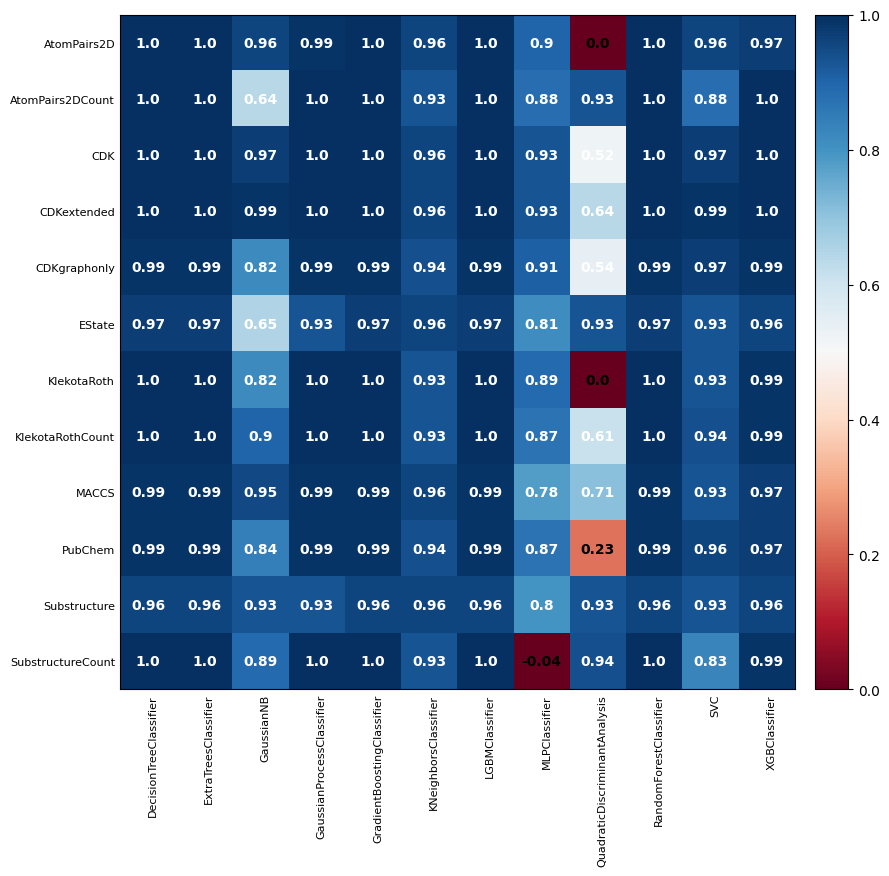

In [ ]:
from zipfile import ZipFile
file_name = "normal_results"
make_heatmap('MCC_train')

#### MCC for test set

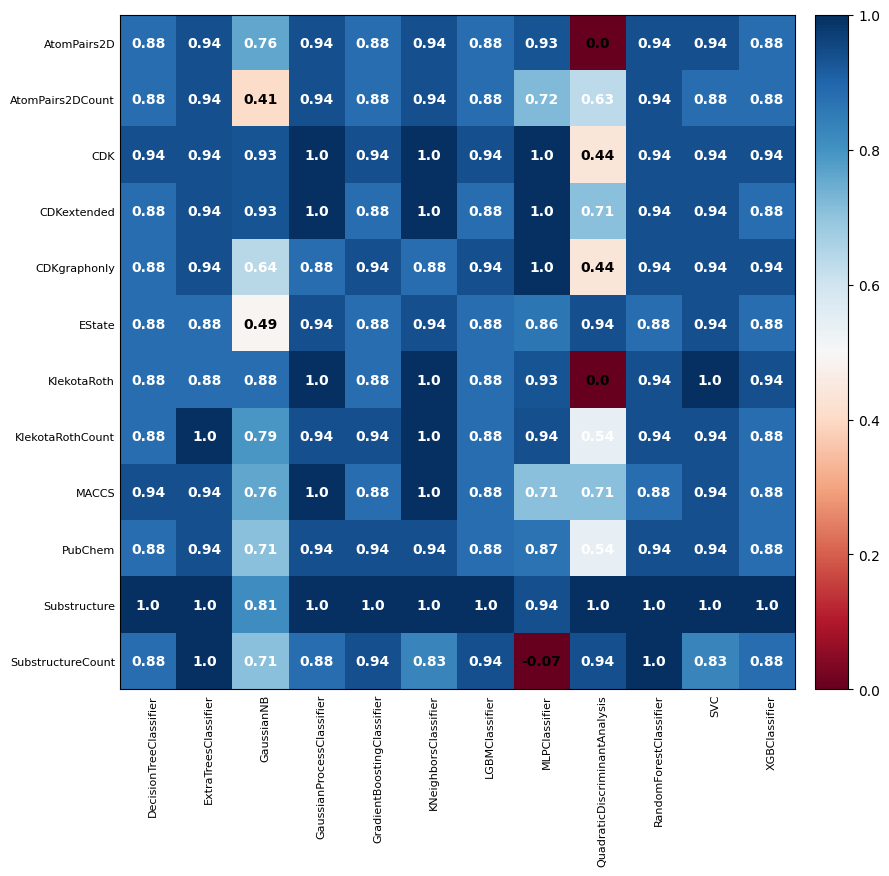

In [ ]:
make_heatmap('MCC_test')

#### MCC for CV set

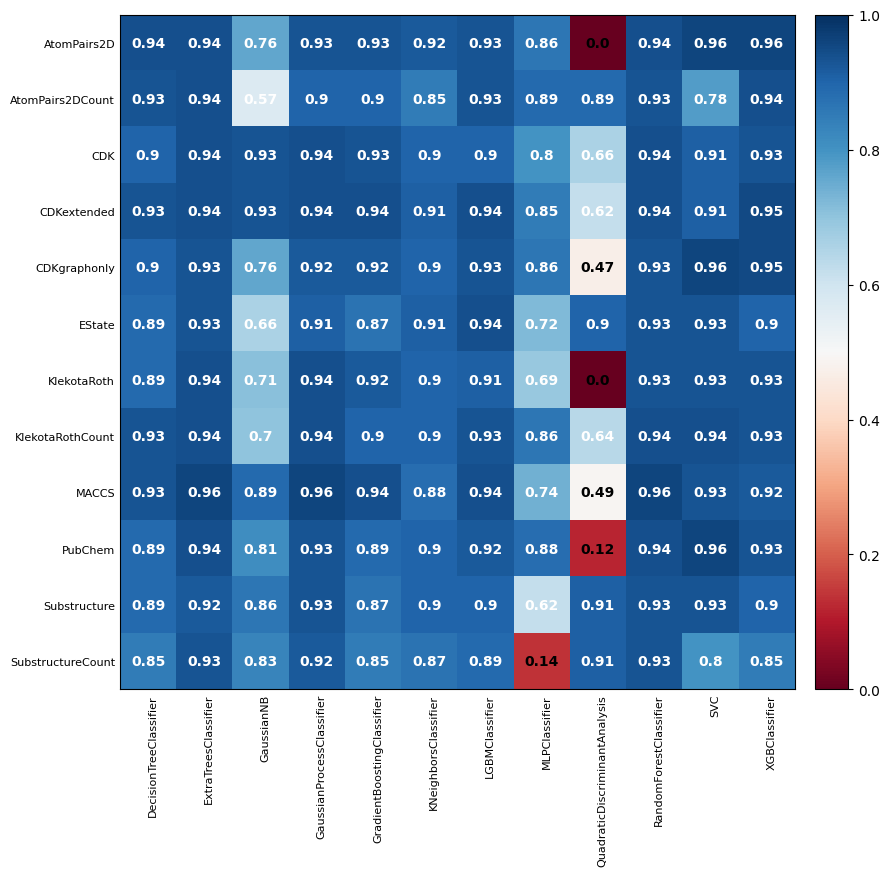

In [ ]:
make_heatmap('MCC_cv')

#### MCC of Training minus MCC of CV set

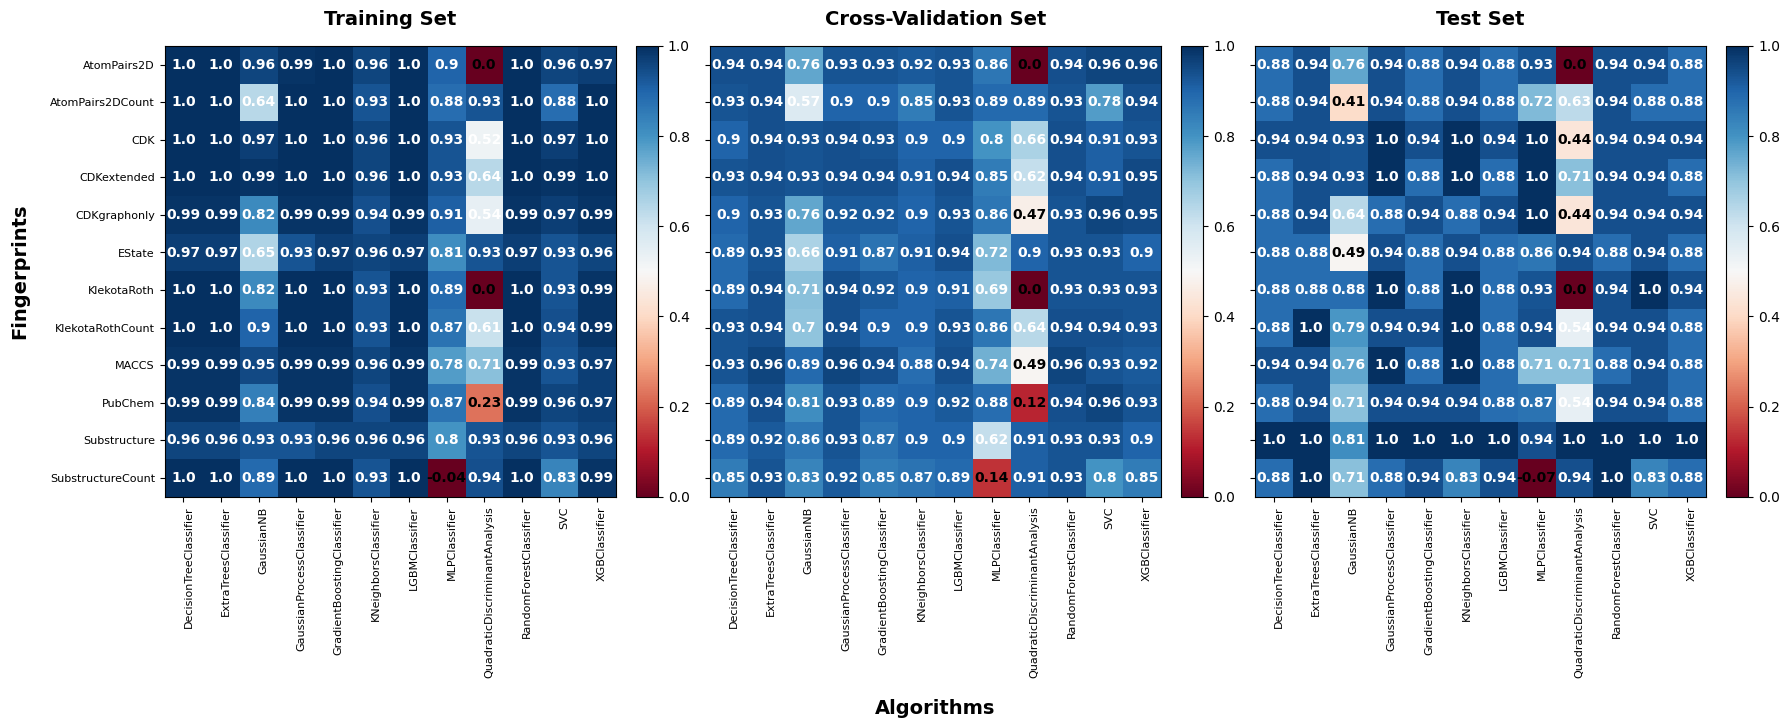

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_heatmap_panel_plot():
    """Generates a panel of heatmaps for different scores."""
    # Prepare the figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10.5))

    # Helper to process and plot each score
    def process_and_plot(ax, score, title):
        # Data processing
        grid_results = pd.concat([df2['Fingerprint'], df2['Algorithm'], df2[score]], axis=1)
        grid_contour = grid_results.groupby(['Fingerprint', 'Algorithm']).mean().reset_index()
        grid_pivot = grid_contour.pivot(index='Fingerprint', columns='Algorithm', values=score)

        # Extract heatmap data
        x = grid_pivot.columns.values
        y = grid_pivot.index.values
        z = np.round(grid_pivot.values, 2)

        # Create heatmap
        im = ax.imshow(z, cmap='RdBu', vmin=0, vmax=1)

        # Add colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        plt.colorbar(im, cax=cax)

        # Remove grid
        ax.grid(False)

        # Set ticks and adjust their position
        ax.set_xticks(np.arange(len(x)))
        ax.set_yticks(np.arange(len(y)))
        ax.set_xticklabels(x, fontsize=8)
        ax.set_yticklabels(y, fontsize=8)

        # Rotate x-axis labels to avoid overlap
        plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

        # Add text annotations
        for i in range(len(y)):
            for j in range(len(x)):
                text_color = "white" if z[i, j] > 0.5 else "black"
                ax.text(j, i, z[i, j], ha="center", va="center", color=text_color, fontweight="bold")

        # Set title
        ax.set_title(title, fontsize=14, fontweight="bold", pad=15)

    # Plot each heatmap
    process_and_plot(ax1, 'MCC_train', 'Training Set')
    process_and_plot(ax2, 'MCC_cv', 'Cross-Validation Set')
    process_and_plot(ax3, 'MCC_test', 'Test Set')

    # Adjust axes labels
    ax1.set_ylabel('Fingerprints', fontweight='bold', fontsize=14, labelpad=15)
    ax2.set_xlabel('Algorithms', fontweight='bold', fontsize=14, labelpad=15)
    ax2.yaxis.set_ticklabels([])
    ax3.yaxis.set_ticklabels([])

    # Final layout adjustments
    fig.tight_layout()
    plt.savefig('Fig_Heatmap_Model_Performance_normal.tiff')
    plt.show()

make_heatmap_panel_plot()


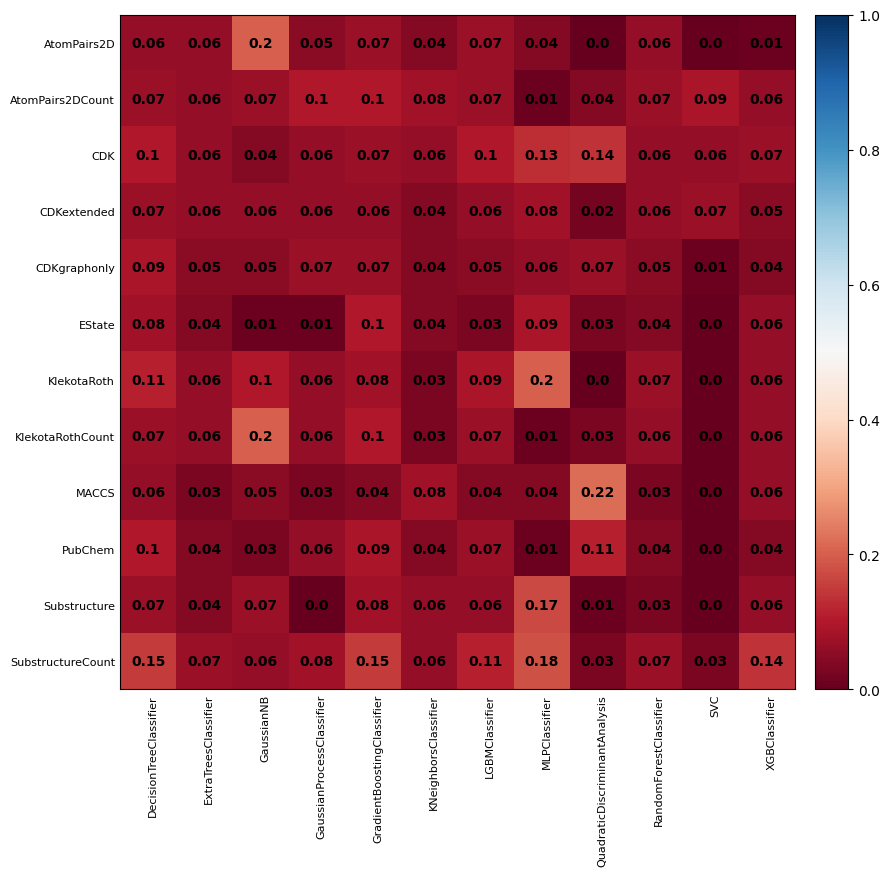

In [ ]:
make_heatmap('MCC_train_cv')

#### MCC of Training minus MCC of Test set

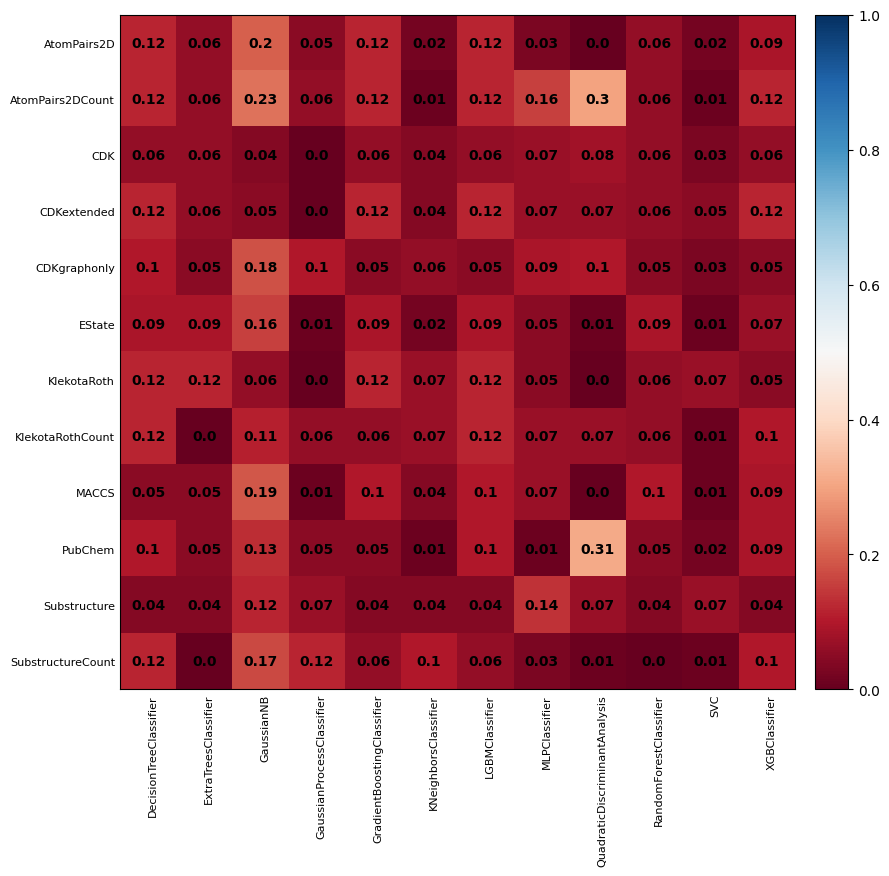

In [ ]:
make_heatmap('MCC_train_test')

#### Oversampling_results

In [ ]:
df = pd.read_csv('oversampling_results.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2 = df.copy()
df2

Fingerprint                      Algorithm  Ac_train  Sn_train  \
0     AtomPairs2DCount         DecisionTreeClassifier     1.000     1.000   
1          AtomPairs2D         DecisionTreeClassifier     1.000     1.000   
2               EState         DecisionTreeClassifier     0.994     0.994   
3          CDKextended         DecisionTreeClassifier     1.000     1.000   
4                  CDK         DecisionTreeClassifier     1.000     1.000   
..                 ...                            ...       ...       ...   
139        KlekotaRoth  QuadraticDiscriminantAnalysis     0.997     1.000   
140              MACCS  QuadraticDiscriminantAnalysis     0.987     0.987   
141            PubChem  QuadraticDiscriminantAnalysis     0.997     1.000   
142  SubstructureCount  QuadraticDiscriminantAnalysis     0.984     0.974   
143       Substructure  QuadraticDiscriminantAnalysis     0.932     0.883   

     Sp_train  MCC_train  Ac_cv  Sn_cv  Sp_cv  MCC_cv  Ac_test  Sn_test  \
0       1.000      1.000  0.987  1.000  0.974   0.976    0.961    1.000   
1       1.000      1.000  0.987  1.000  0.974   0.975    0.961    1.000   
2       0.994      0.987  0.981  0.994  0.968   0.962    0.961    1.000   
3       1.000      1.000  0.997  1.000  0.994   0.994    0.941    1.000   
4       1.000      1.000  0.984  1.000  0.968   0.969    0.980    1.000   
..        ...        ...    ...    ...    ...     ...      ...      ...   
139     0.994      0.994  0.961  0.987  0.935   0.925    1.000    1.000   
140     0.987      0.974  0.984  0.987  0.981   0.968    0.961    0.889   
141     0.994      0.994  0.987  0.981  0.994   0.974    0.961    1.000   
142     0.994      0.968  0.971  0.961  0.981   0.942    0.980    1.000   
143     0.981      0.868  0.935  0.890  0.981   0.875    1.000    1.000   

     Sp_test  MCC_test  MCC_train_cv  MCC_train_test  
0      0.952     0.883         0.024           0.117  
1      0.952     0.883         0.025           0.117  
2      0.952     0.883         0.025           0.104  
3      0.929     0.835         0.006           0.165  
4      0.976     0.937         0.031           0.063  
..       ...       ...           ...             ...  
139    1.000     1.000         0.068           0.006  
140    0.976     0.865         0.006           0.109  
141    0.952     0.883         0.019           0.111  
142    0.976     0.937         0.026           0.030  
143    1.000     1.000         0.007           0.132  

[144 rows x 16 columns]

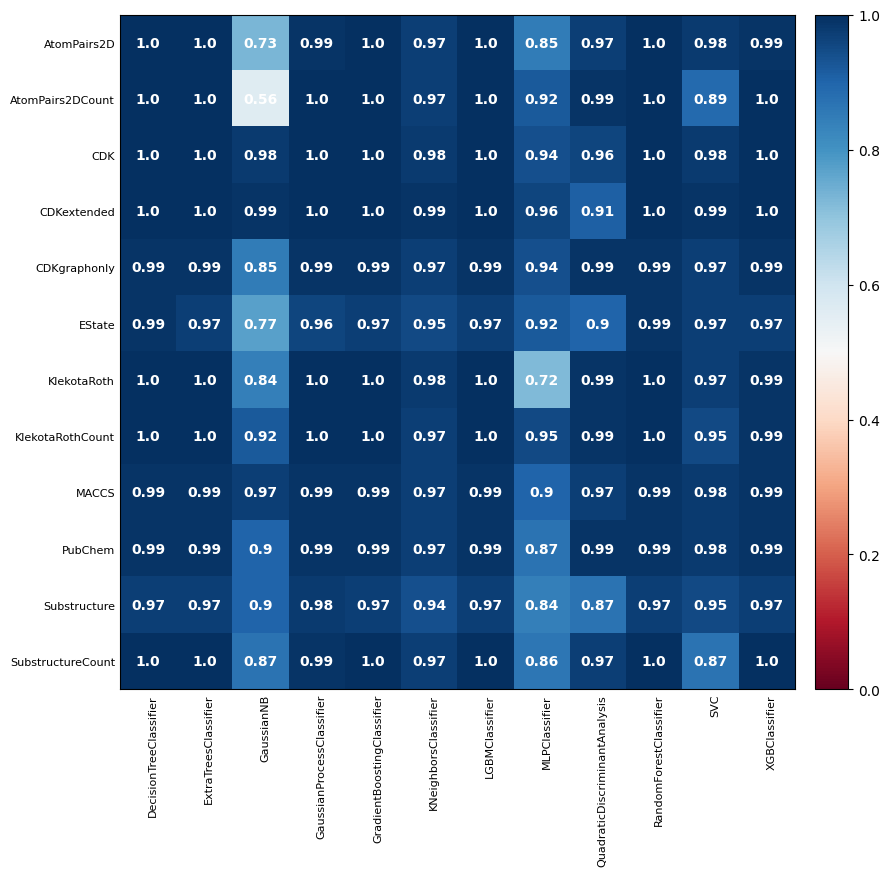

In [ ]:
from zipfile import ZipFile
file_name = "oversampling_results"
make_heatmap('MCC_train')

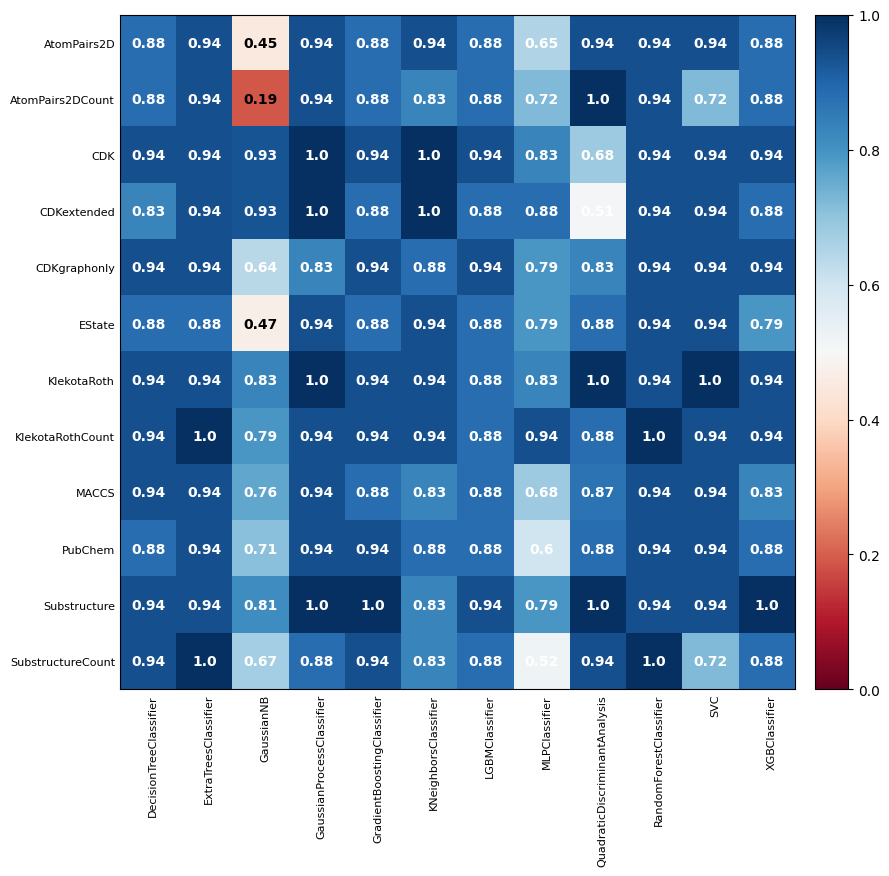

In [ ]:
make_heatmap('MCC_test')

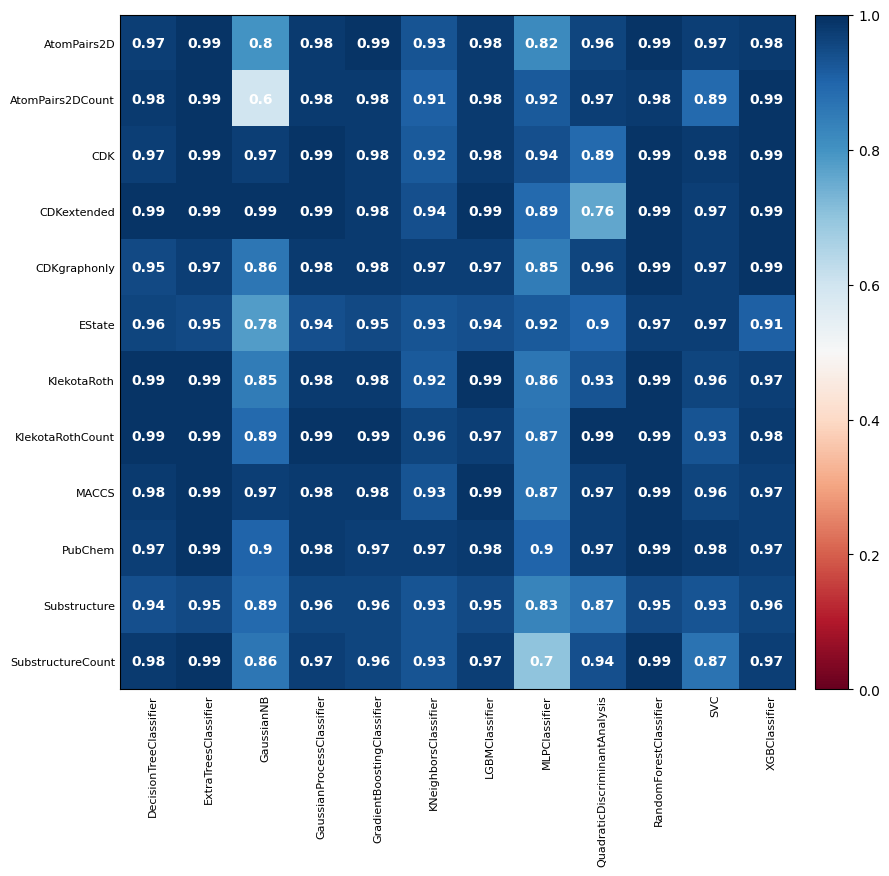

In [ ]:
make_heatmap('MCC_cv')

Data for MCC_train:         Fingerprint               Algorithm  MCC_train
0  AtomPairs2DCount  DecisionTreeClassifier      1.000
1       AtomPairs2D  DecisionTreeClassifier      1.000
2            EState  DecisionTreeClassifier      0.987
3       CDKextended  DecisionTreeClassifier      1.000
4               CDK  DecisionTreeClassifier      1.000
Grouped data for MCC_train:    Fingerprint                   Algorithm  MCC_train
0  AtomPairs2D      DecisionTreeClassifier      1.000
1  AtomPairs2D        ExtraTreesClassifier      1.000
2  AtomPairs2D                  GaussianNB      0.732
3  AtomPairs2D   GaussianProcessClassifier      0.994
4  AtomPairs2D  GradientBoostingClassifier      1.000
Pivoted data for MCC_train: Algorithm         DecisionTreeClassifier  ExtraTreesClassifier  GaussianNB  \
Fingerprint                                                                  
AtomPairs2D                        1.000                 1.000       0.732   
AtomPairs2DCount                   1

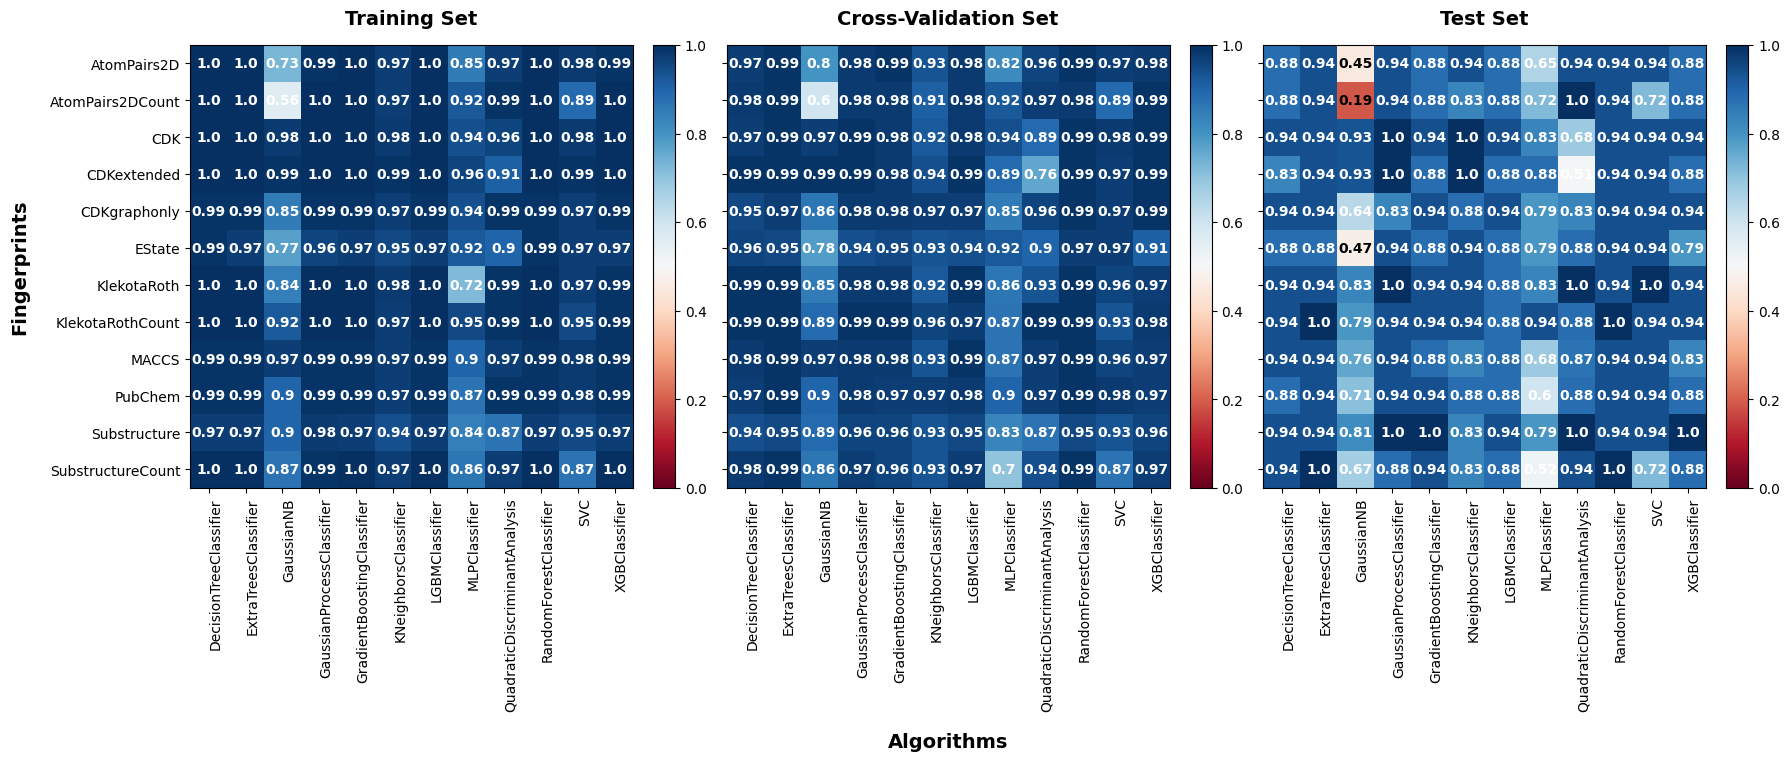

In [ ]:
import time

def make_heatmap_panel_plot():
    """Generates a panel of heatmaps for different scores."""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10.5))

    # Helper function to process and plot each heatmap
    def process_and_plot(ax, score, title):
        start_time = time.time()

        # Data processing
        grid_results = pd.concat([df2['Fingerprint'], df2['Algorithm'], df2[score]], axis=1)
        print(f"Data for {score}: {grid_results.head()}")

        grid_contour = grid_results.groupby(['Fingerprint', 'Algorithm']).mean().reset_index()
        print(f"Grouped data for {score}: {grid_contour.head()}")

        grid_pivot = grid_contour.pivot(index='Fingerprint', columns='Algorithm', values=score)
        print(f"Pivoted data for {score}: {grid_pivot.head()}")

        # Extract heatmap data
        x = grid_pivot.columns.values
        y = grid_pivot.index.values
        z = np.round(grid_pivot.values, 2)

        # Create heatmap
        im = ax.imshow(z, cmap='RdBu', vmin=0, vmax=1)

        # Add colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        plt.colorbar(im, cax=cax)

        # Set ticks
        ax.set_xticks(np.arange(len(x)))
        ax.set_yticks(np.arange(len(y)))
        ax.set_xticklabels(x)
        ax.set_yticklabels(y)

        # Rotate x-axis labels
        plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

        # Add text annotations
        for i in range(len(y)):
            for j in range(len(x)):
                text_color = "white" if z[i, j] > 0.5 else "black"
                ax.text(j, i, z[i, j], ha="center", va="center", color=text_color, fontweight="bold")

        # Set title
        ax.set_title(title, fontsize=14, fontweight="bold", pad=15)

        print(f"Time taken for {title}: {time.time() - start_time} seconds")

    # Plot each heatmap
    process_and_plot(ax1, 'MCC_train', 'Training Set')
    process_and_plot(ax2, 'MCC_cv', 'Cross-Validation Set')
    process_and_plot(ax3, 'MCC_test', 'Test Set')

    # Adjust axes labels
    ax1.set_ylabel('Fingerprints', fontweight='bold', fontsize=14, labelpad=15)
    ax2.set_xlabel('Algorithms', fontweight='bold', fontsize=14, labelpad=15)
    ax2.yaxis.set_ticklabels([])
    ax3.yaxis.set_ticklabels([])

    # Final layout adjustments
    fig.tight_layout()
    plt.savefig('Over_Fig_Heatmap_Model_Performance.tiff')
    plt.show()
    fig.savefig('Over_Fig_Heatmap_Model_Performance.tiff')

make_heatmap_panel_plot()

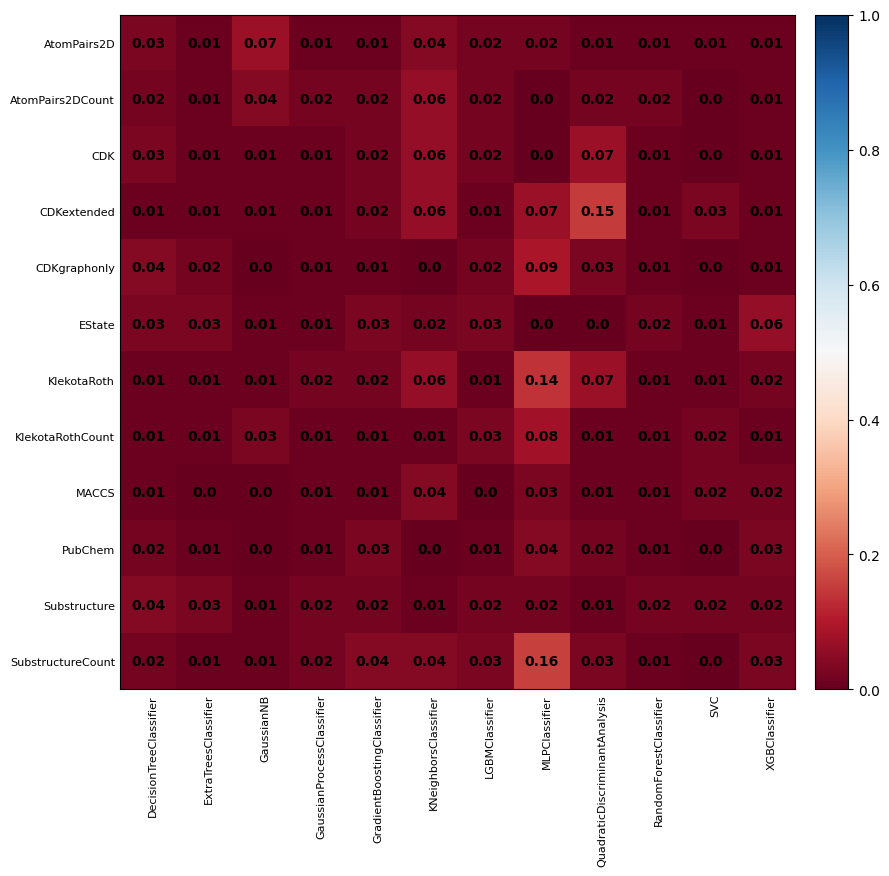

In [ ]:
make_heatmap('MCC_train_cv')

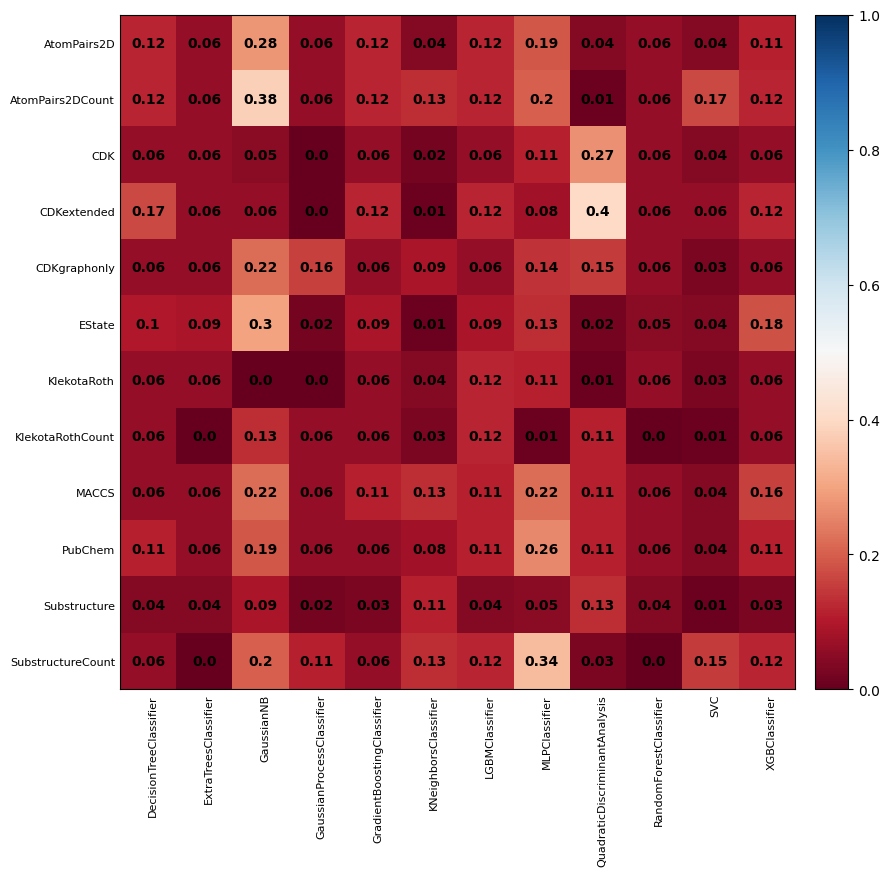

In [ ]:
make_heatmap('MCC_train_test')

#### Undersampling_results

In [ ]:
df = pd.read_csv('undersampling_results.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2 = df.copy()
df2

Fingerprint                   Algorithm  Ac_train  Sn_train  \
0          AtomPairs2D                         SVC     0.978     0.957   
1          AtomPairs2D      DecisionTreeClassifier     1.000     1.000   
2          AtomPairs2D   GaussianProcessClassifier     0.989     0.978   
3          AtomPairs2D        ExtraTreesClassifier     1.000     1.000   
4          AtomPairs2D               MLPClassifier     0.935     0.957   
..                 ...                         ...       ...       ...   
139  SubstructureCount        ExtraTreesClassifier     1.000     1.000   
140  SubstructureCount  GradientBoostingClassifier     1.000     1.000   
141  SubstructureCount      DecisionTreeClassifier     1.000     1.000   
142  SubstructureCount               XGBClassifier     0.978     0.978   
143  SubstructureCount   GaussianProcessClassifier     1.000     1.000   

     Sp_train  MCC_train  Ac_cv  Sn_cv  Sp_cv  MCC_cv  Ac_test  Sn_test  \
0       1.000      0.957  0.957  0.956  0.956   0.917    0.941    1.000   
1       1.000      1.000  0.924  0.956  0.891   0.858    0.941    1.000   
2       1.000      0.978  0.956  0.956  0.956   0.918    0.941    1.000   
3       1.000      1.000  0.967  0.956  0.978   0.938    0.980    1.000   
4       0.913      0.870  0.830  0.978  0.689   0.684    0.863    1.000   
..        ...        ...    ...    ...    ...     ...      ...      ...   
139     1.000      1.000  0.945  0.958  0.933   0.893    0.941    1.000   
140     1.000      1.000  0.945  0.956  0.933   0.893    0.941    1.000   
141     1.000      1.000  0.913  0.891  0.938   0.831    0.961    1.000   
142     0.978      0.957  0.957  0.956  0.956   0.915    0.902    1.000   
143     1.000      1.000  0.989  0.978  1.000   0.979    0.941    1.000   

     Sp_test  MCC_test  MCC_train_cv  MCC_train_test  
0      0.929     0.835         0.040           0.123  
1      0.929     0.835         0.142           0.165  
2      0.929     0.835         0.060           0.144  
3      0.976     0.937         0.062           0.063  
4      0.833     0.685         0.187           0.186  
..       ...       ...           ...             ...  
139    0.929     0.835         0.107           0.165  
140    0.929     0.835         0.107           0.165  
141    0.952     0.883         0.169           0.117  
142    0.881     0.753         0.041           0.204  
143    0.929     0.835         0.021           0.165  

[144 rows x 16 columns]

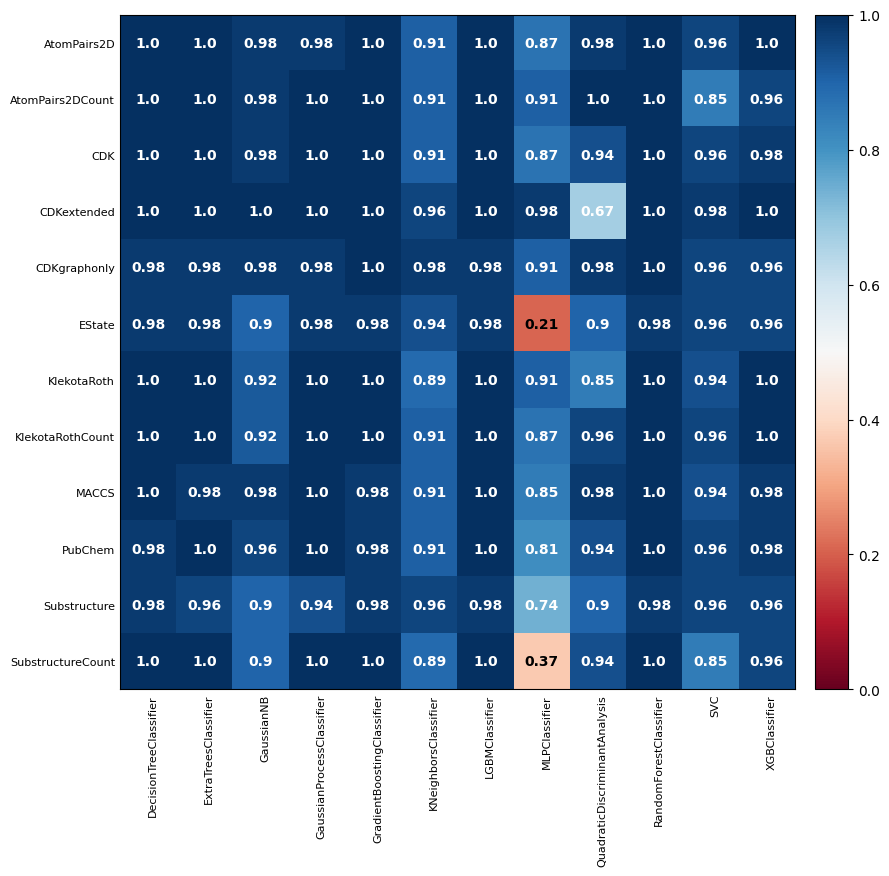

In [ ]:
from zipfile import ZipFile
file_name = "undersampling_results"
make_heatmap('MCC_train')

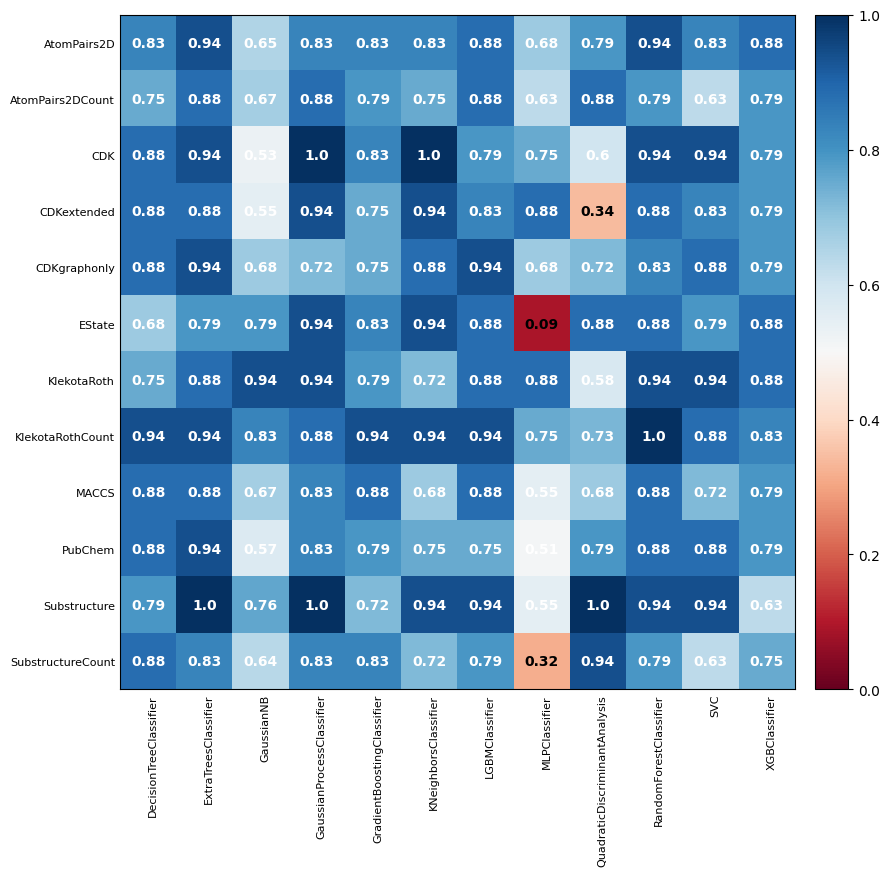

In [ ]:
make_heatmap('MCC_test')

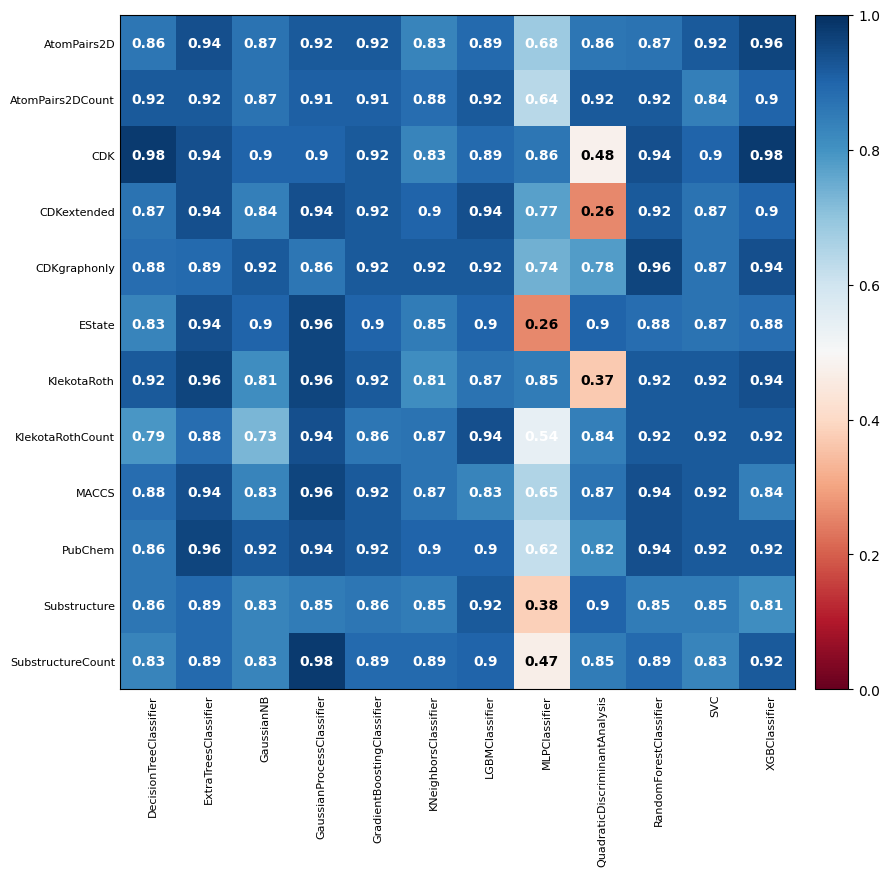

In [ ]:
make_heatmap('MCC_cv')

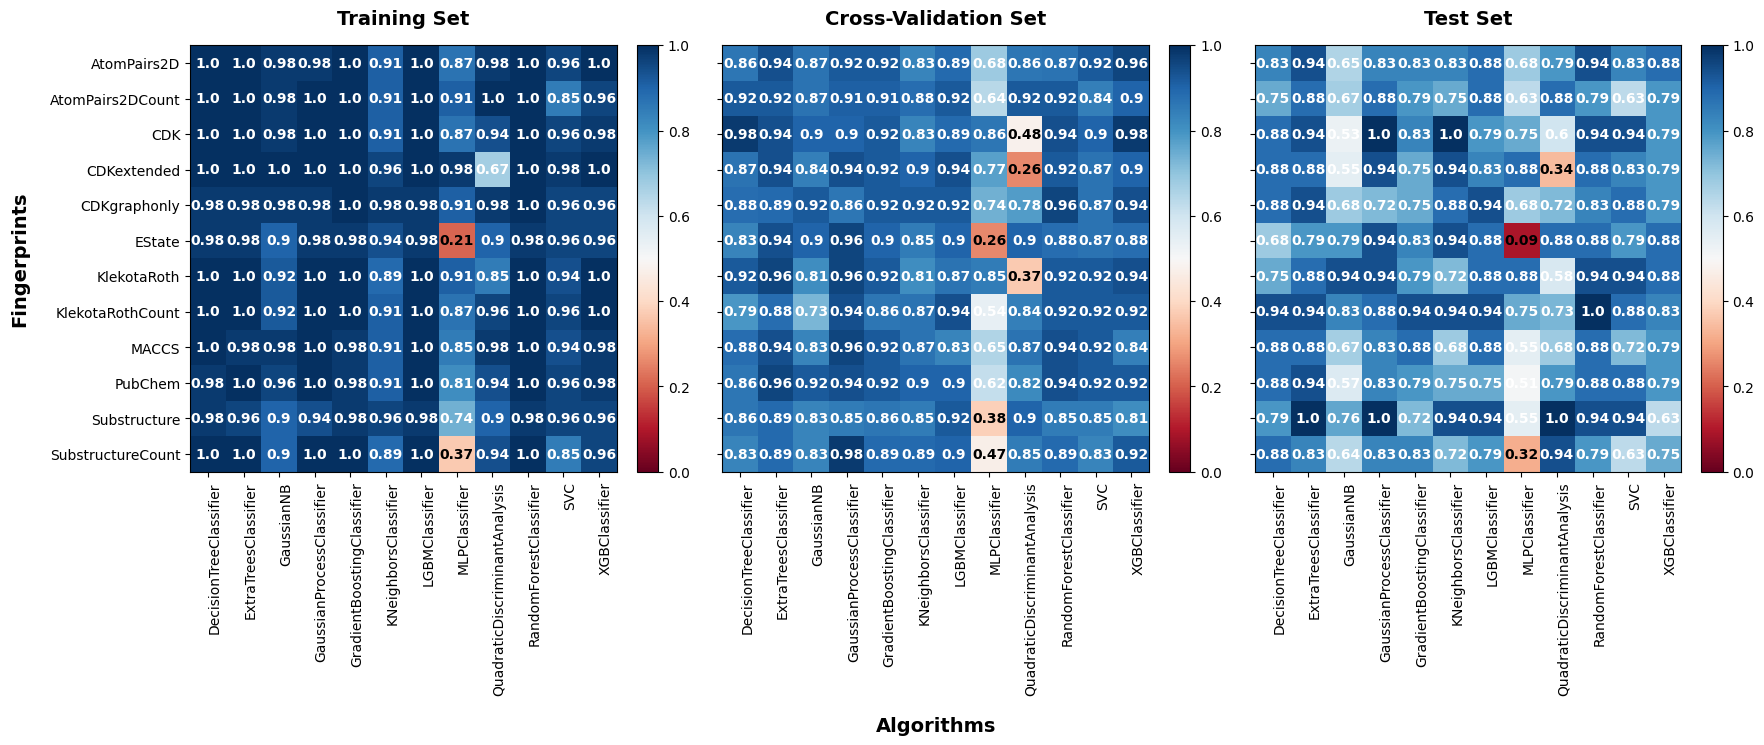

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_heatmap_panel_plot():
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10.5))

    # Helper function to process and plot each heatmap
    def process_and_plot(ax, score, title):
        # Data processing
        grid_results = pd.concat([df2['Fingerprint'], df2['Algorithm'], df2[score]], axis=1)
        grid_contour = grid_results.groupby(['Fingerprint', 'Algorithm']).mean().reset_index()
        grid_pivot = grid_contour.pivot(index='Fingerprint', columns='Algorithm', values=score)

        # Extract heatmap data
        x = grid_pivot.columns.values
        y = grid_pivot.index.values
        z = np.round(grid_pivot.values, 2)

        # Create heatmap
        im = ax.imshow(z, cmap='RdBu', vmin=0, vmax=1)

        # Add colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        plt.colorbar(im, cax=cax)

        # Set ticks
        ax.set_xticks(np.arange(len(x)))
        ax.set_yticks(np.arange(len(y)))
        ax.set_xticklabels(x)
        ax.set_yticklabels(y)

        # Rotate x-axis labels
        plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

        # Add text annotations with adjusted padding for spacing
        for i in range(len(y)):
            for j in range(len(x)):
                text_color = "white" if z[i, j] > 0.5 else "black"
                ax.text(j, i, z[i, j], ha="center", va="center", color=text_color, fontweight="bold", fontsize=10)

        # Set title
        ax.set_title(title, fontsize=14, fontweight="bold", pad=15)

        # Remove grid lines
        ax.grid(False)

    # Plot each heatmap
    process_and_plot(ax1, 'MCC_train', 'Training Set')
    process_and_plot(ax2, 'MCC_cv', 'Cross-Validation Set')
    process_and_plot(ax3, 'MCC_test', 'Test Set')

    # Adjust axes labels
    ax1.set_ylabel('Fingerprints', fontweight='bold', fontsize=14, labelpad=15)
    ax2.set_xlabel('Algorithms', fontweight='bold', fontsize=14, labelpad=15)
    ax2.yaxis.set_ticklabels([])
    ax3.yaxis.set_ticklabels([])

    # Final layout adjustments
    fig.tight_layout(pad=2.0)  # Increased padding between subplots
    plt.savefig('Under_Fig_Heatmap_Model_Performance.tiff')
    plt.show()

make_heatmap_panel_plot()


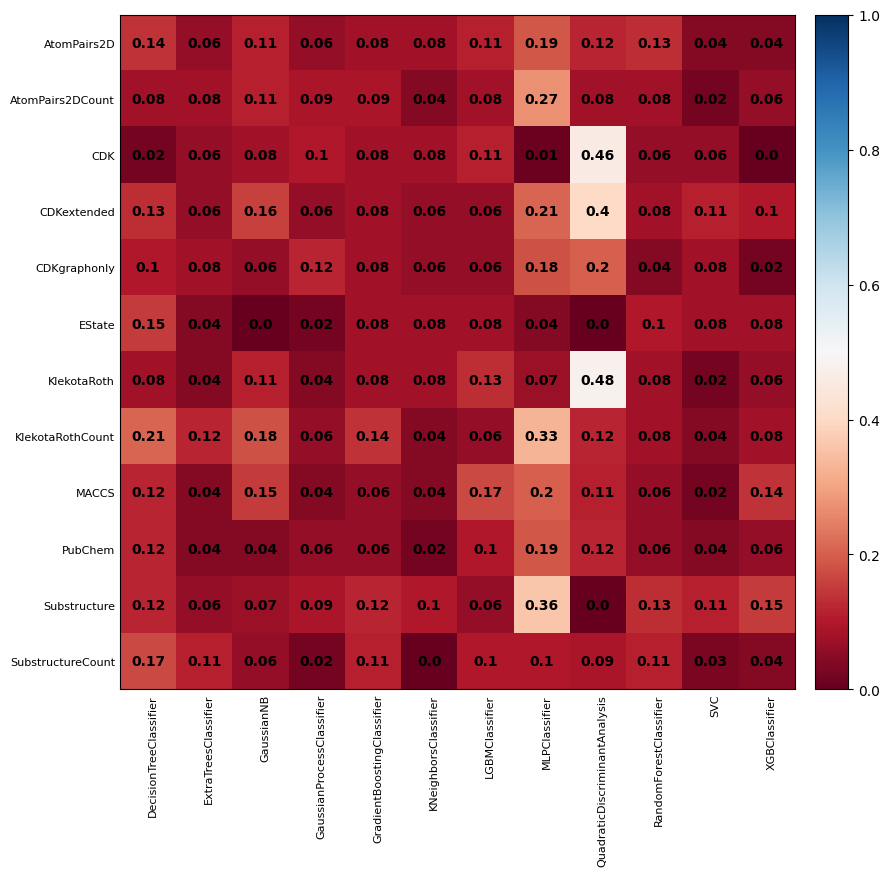

In [ ]:
make_heatmap('MCC_train_cv')

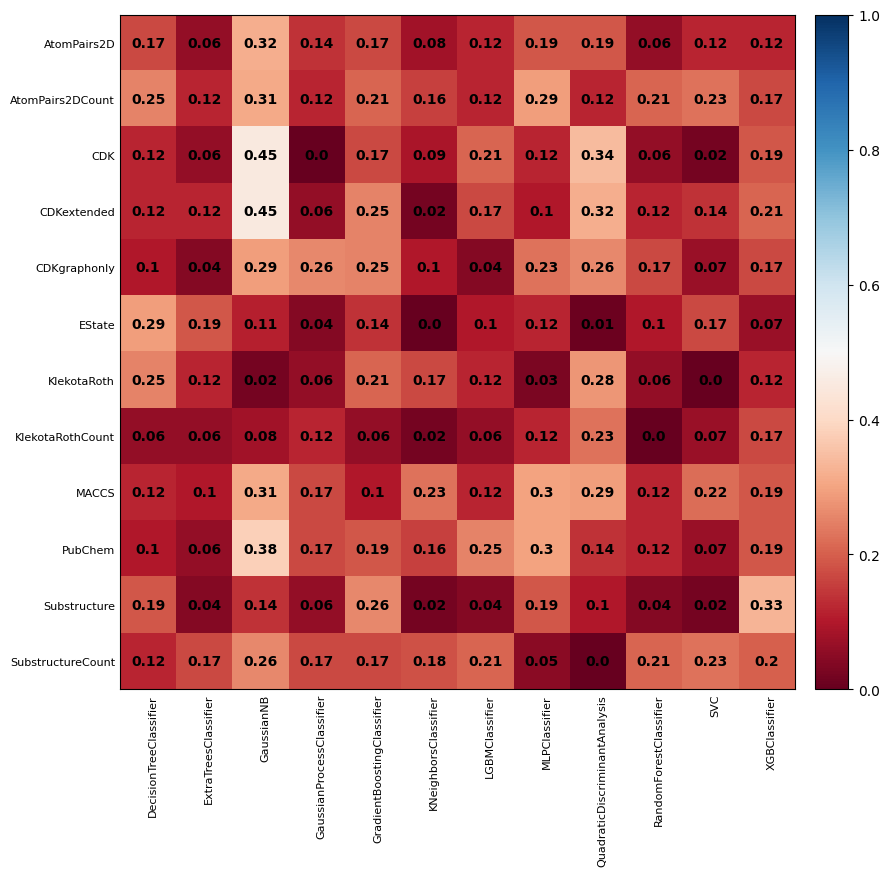

In [ ]:
make_heatmap('MCC_train_test')

### MCC_test Comparison between Models and Descriptors in the Sampling


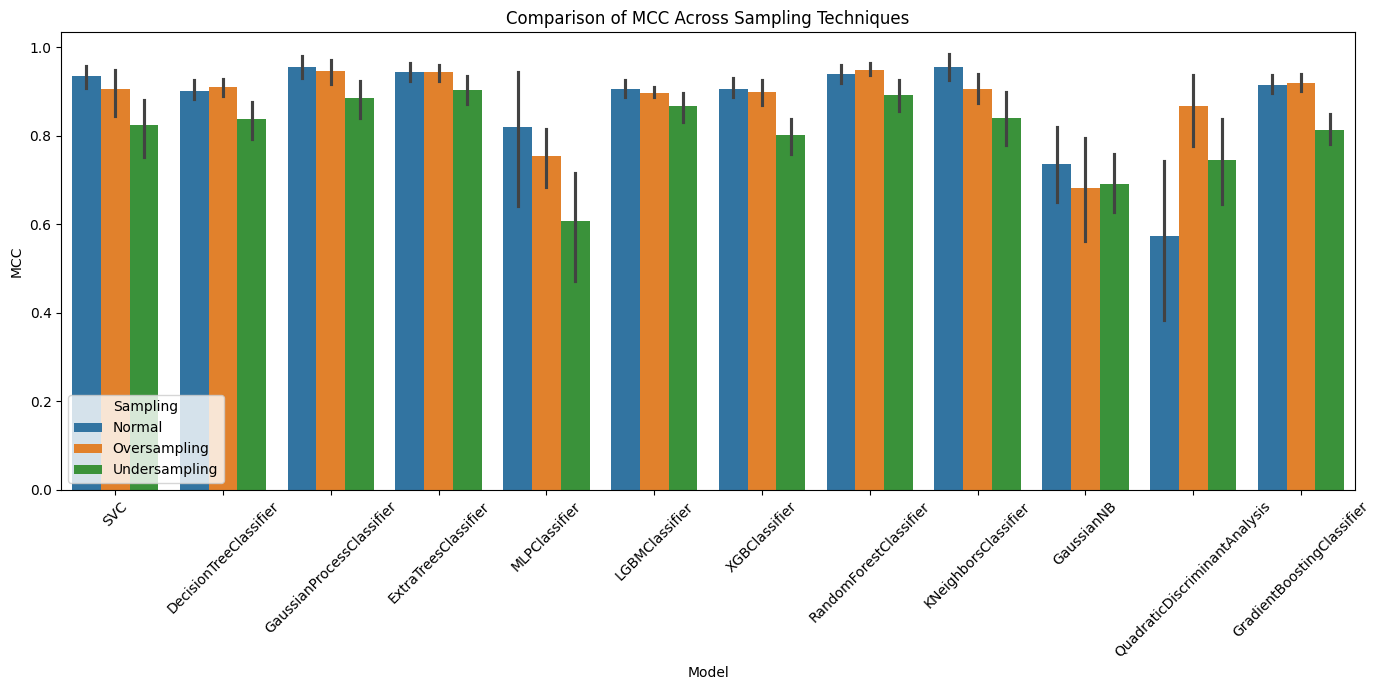

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fix overwritten 'zip' function if needed
zip = __builtins__.zip

# Load the three datasets
normal_df = pd.read_csv('normal_results.csv')
oversampling_df = pd.read_csv('oversampling_results.csv')
undersampling_df = pd.read_csv('undersampling_results.csv')

# Standardize column names for plotting
for df, label in zip([normal_df, oversampling_df, undersampling_df], ['Normal', 'Oversampling', 'Undersampling']):
    df.rename(columns={'Algorithm': 'Model', 'MCC_test': 'MCC'}, inplace=True)
    df['Sampling'] = label

# Concatenate into one DataFrame
combined_df = pd.concat([normal_df, oversampling_df, undersampling_df], ignore_index=True)

# Plot and save
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='MCC', hue='Sampling', data=combined_df)
plt.title('Comparison of MCC Across Sampling Techniques')
plt.xticks(rotation=45)
plt.tight_layout()

# Save as TIFF
plt.savefig('MCC_Comparison_Sampling.tiff', format='tiff', dpi=300)

plt.show()


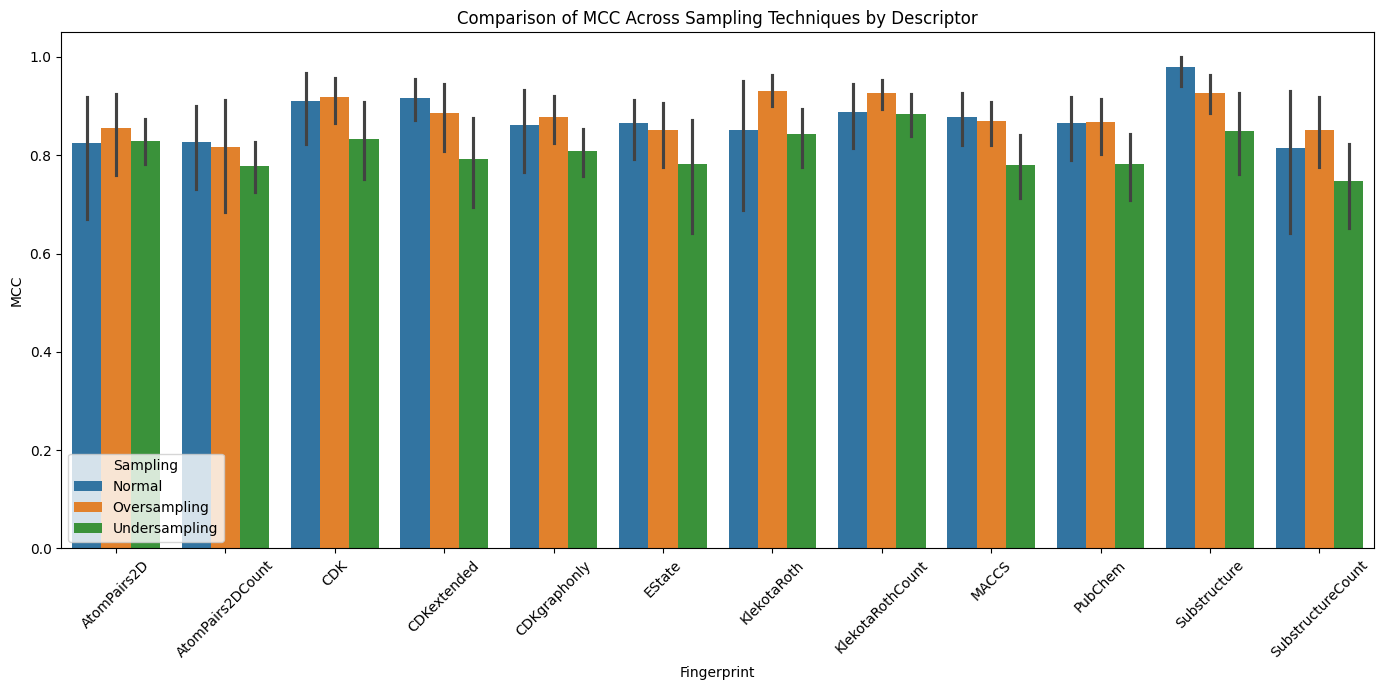

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fix overwritten 'zip' function if needed
zip = __builtins__.zip

# Load the three datasets
normal_df = pd.read_csv('normal_results.csv')
oversampling_df = pd.read_csv('oversampling_results.csv')
undersampling_df = pd.read_csv('undersampling_results.csv')

# Standardize column names for plotting
for df, label in zip([normal_df, oversampling_df, undersampling_df], ['Normal', 'Oversampling', 'Undersampling']):
    df.rename(columns={'Algorithm': 'Model', 'MCC_test': 'MCC'}, inplace=True)
    df['Sampling'] = label

# Combine all dataframes into one
combined_df = pd.concat([normal_df, oversampling_df, undersampling_df], ignore_index=True)

# Plot MCC by Descriptor (Fingerprint)
plt.figure(figsize=(14, 7))
sns.barplot(x='Fingerprint', y='MCC', hue='Sampling', data=combined_df)
plt.title('Comparison of MCC Across Sampling Techniques by Descriptor')
plt.xticks(rotation=45)
plt.tight_layout()

# Save as high-resolution TIFF
plt.savefig('MCC_Comparison_By_Descriptor.tiff', format='tiff', dpi=300)
plt.show()

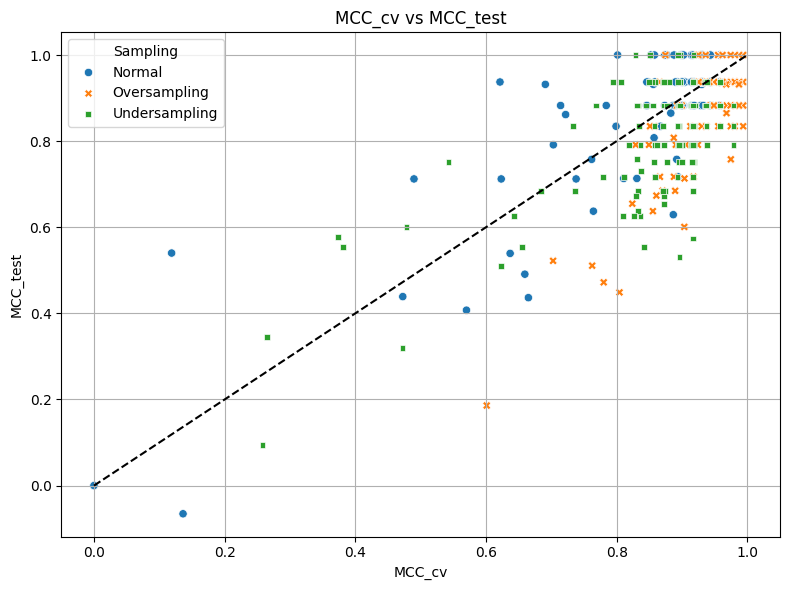

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='MCC_cv', y='MCC_test', hue='Sampling', style='Sampling')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('MCC_cv vs MCC_test')
plt.xlabel('MCC_cv')
plt.ylabel('MCC_test')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save as high-resolution TIFF
plt.savefig('MCC_cv_vs_MCC_test.tiff', format='tiff', dpi=300)


In [ ]:
# Calculate some key statistics for additional visualization possibilities
print("Additional Analysis Possibilities:\n")

# 1. Model performance variability analysis
print("1. Model Performance Variability Analysis:")
print("   - Standard deviation of MCC test scores by algorithm across sampling methods")
algorithm_variability = combined_df.groupby('Algorithm')['MCC_test'].agg(['mean', 'std']).round(4)
print(algorithm_variability.sort_values('std', ascending=False))

print("\n2. Fingerprint Performance Stability:")
print("   - Standard deviation of MCC test scores by fingerprint across sampling methods")
fingerprint_variability = combined_df.groupby('Fingerprint')['MCC_test'].agg(['mean', 'std']).round(4)
print(fingerprint_variability.sort_values('std', ascending=False))

print("\n3. Overfitting Analysis (Train-Test Gap):")
print("   - Average train-test MCC gap by sampling method")
overfitting_analysis = combined_df.groupby('Sampling')['MCC_train_test'].agg(['mean', 'std']).round(4)
print(overfitting_analysis)

print("\n4. Cross-validation reliability:")
print("   - Train-CV MCC gap by sampling method")
cv_reliability = combined_df.groupby('Sampling')['MCC_train_cv'].agg(['mean', 'std']).round(4)
print(cv_reliability)

Additional Analysis Possibilities:

1. Model Performance Variability Analysis:
   - Standard deviation of MCC test scores by algorithm across sampling methods
                               mean   std
Algorithm                                
QuadraticDiscriminantAnalysis 0.729 0.256
MLPClassifier                 0.727 0.237
GaussianNB                    0.703 0.169
SVC                           0.888 0.097
KNeighborsClassifier          0.900 0.091
XGBClassifier                 0.869 0.073
GradientBoostingClassifier    0.883 0.067
GaussianProcessClassifier     0.928 0.067
DecisionTreeClassifier        0.883 0.061
RandomForestClassifier        0.926 0.050
LGBMClassifier                0.890 0.046
ExtraTreesClassifier          0.930 0.046

2. Fingerprint Performance Stability:
   - Standard deviation of MCC test scores by fingerprint across sampling methods
                   mean   std
Fingerprint                  
SubstructureCount 0.804 0.207
AtomPairs2D       0.836 0.178
KlekotaRoth 

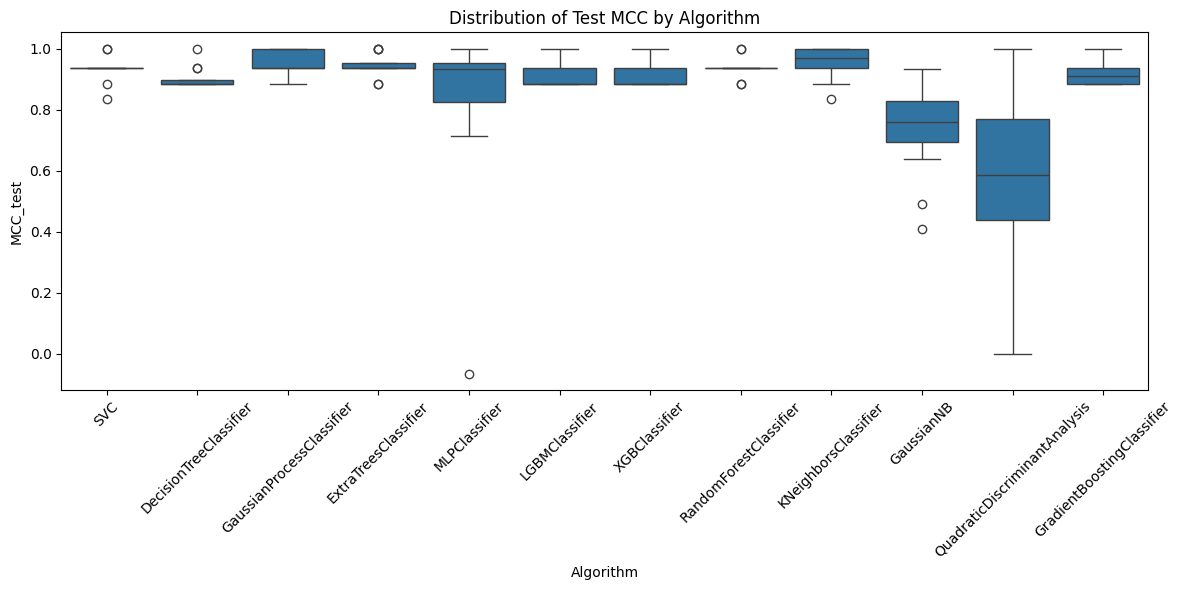

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('normal_results.csv')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Algorithm', y='MCC_test', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Test MCC by Algorithm')
plt.tight_layout()
plt.show()


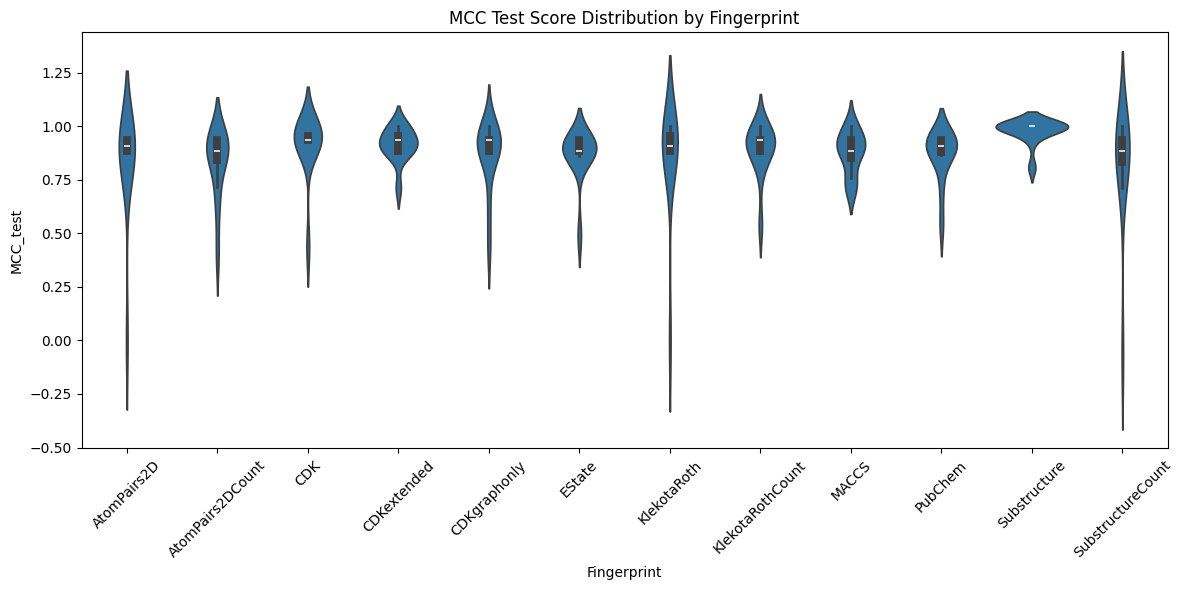

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Fingerprint', y='MCC_test', data=df)
plt.xticks(rotation=45)
plt.title('MCC Test Score Distribution by Fingerprint')
plt.tight_layout()
plt.show()


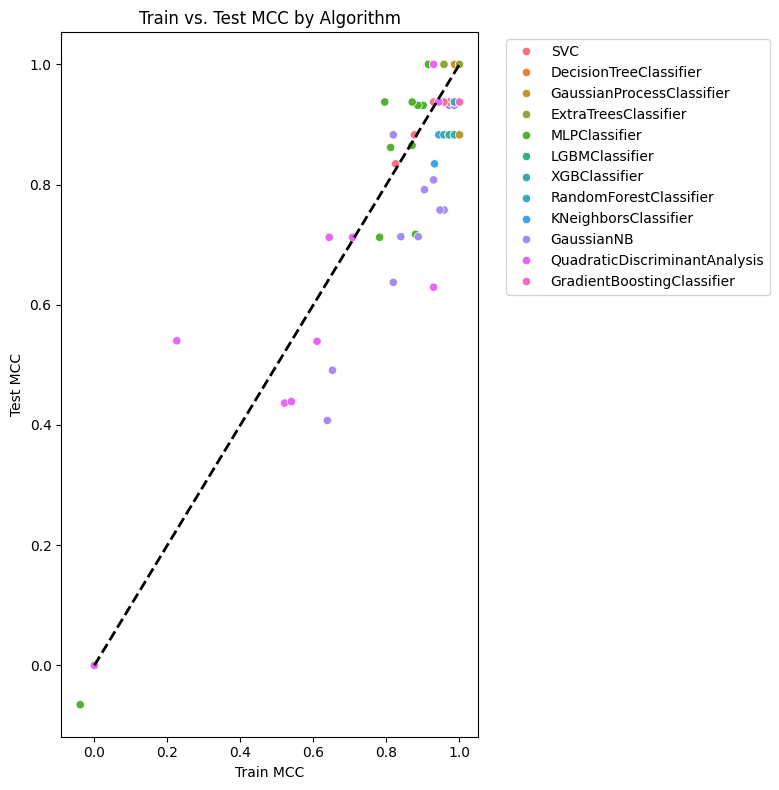

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='MCC_train', y='MCC_test', hue='Algorithm', data=df)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('Train MCC')
plt.ylabel('Test MCC')
plt.title('Train vs. Test MCC by Algorithm')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


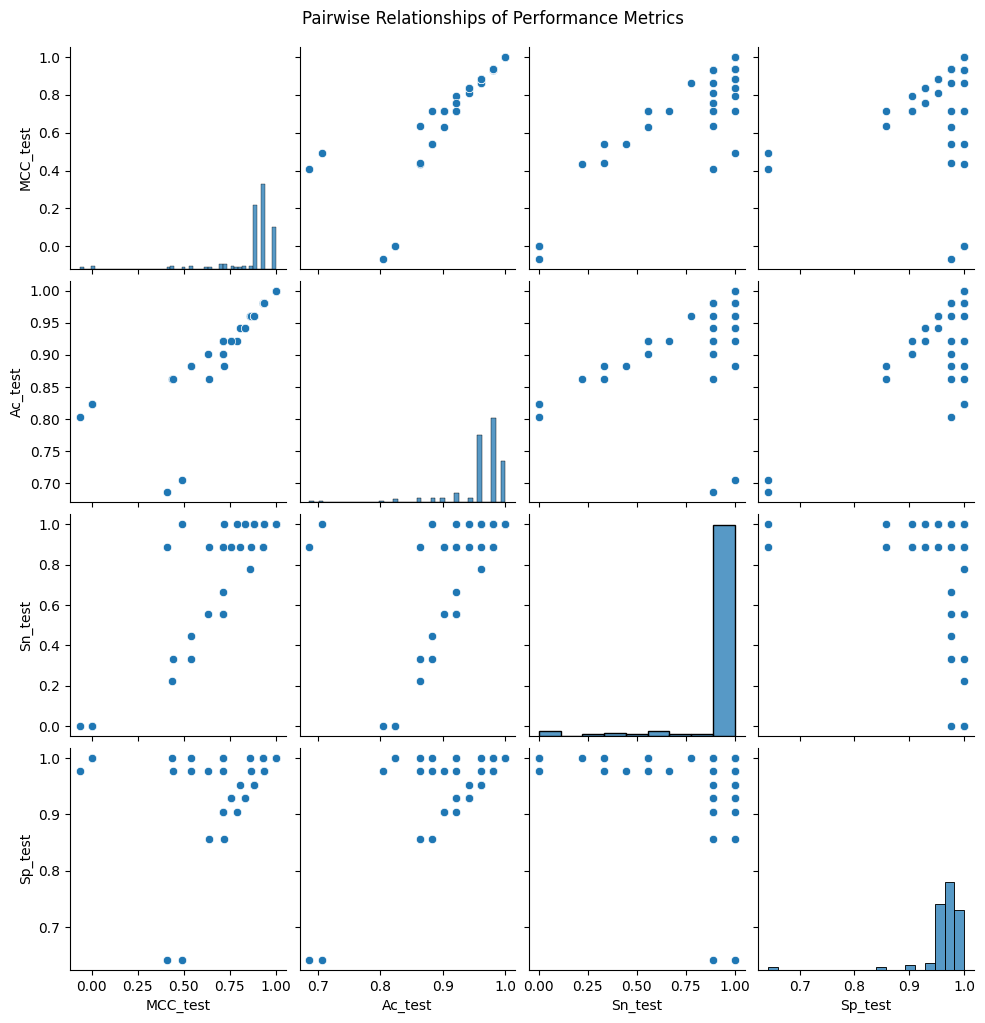

In [ ]:
metrics = ['MCC_test', 'Ac_test', 'Sn_test', 'Sp_test']
sns.pairplot(df[metrics])
plt.suptitle('Pairwise Relationships of Performance Metrics', y=1.02)
plt.show()


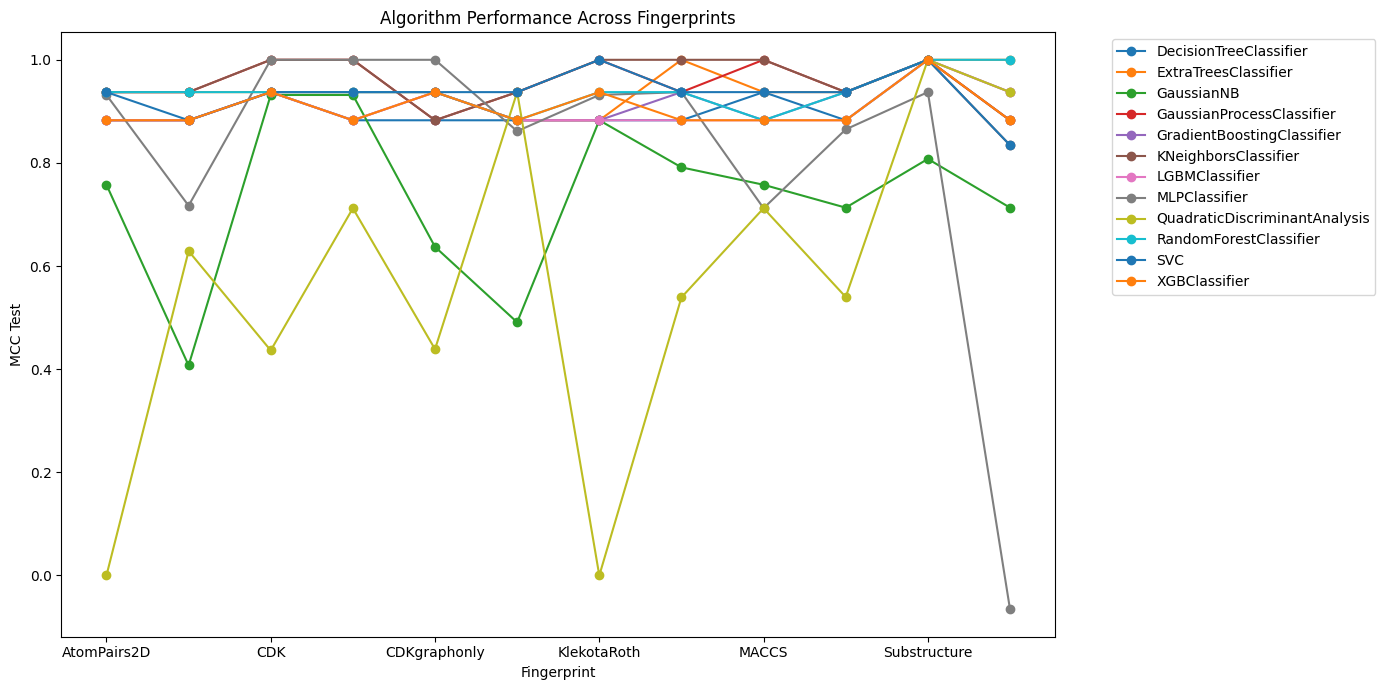

In [ ]:
import numpy as np

pivot = df.pivot(index='Fingerprint', columns='Algorithm', values='MCC_test')
pivot.plot(marker='o', figsize=(14, 7))
plt.ylabel('MCC Test')
plt.title('Algorithm Performance Across Fingerprints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


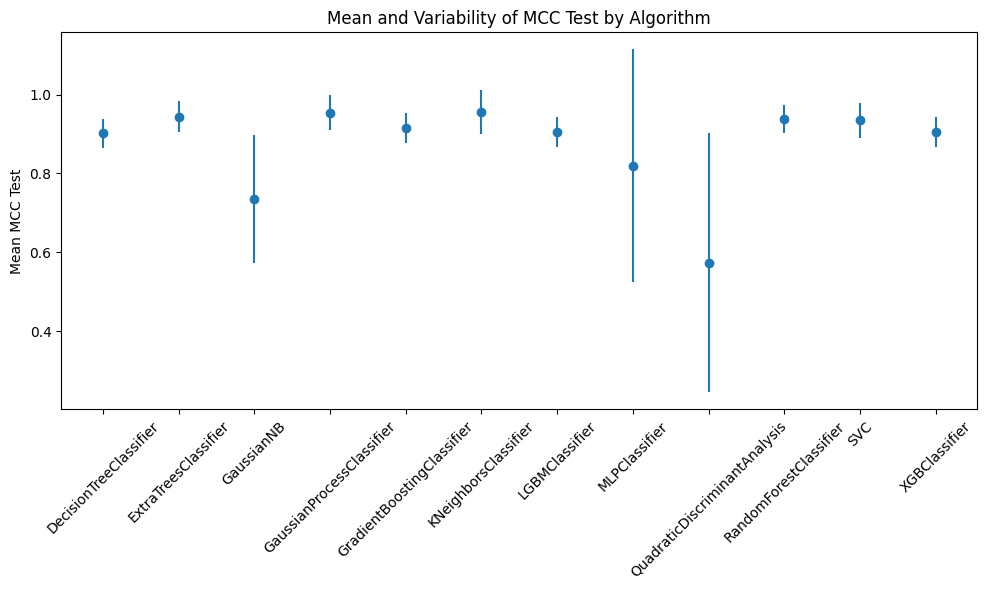

In [ ]:
algo_stats = df.groupby('Algorithm')['MCC_test'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(10, 6))
plt.errorbar(algo_stats['Algorithm'], algo_stats['mean'], yerr=algo_stats['std'], fmt='o')
plt.xticks(rotation=45)
plt.ylabel('Mean MCC Test')
plt.title('Mean and Variability of MCC Test by Algorithm')
plt.tight_layout()
plt.show()


/tmp/ipython-input-10-3372970368.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


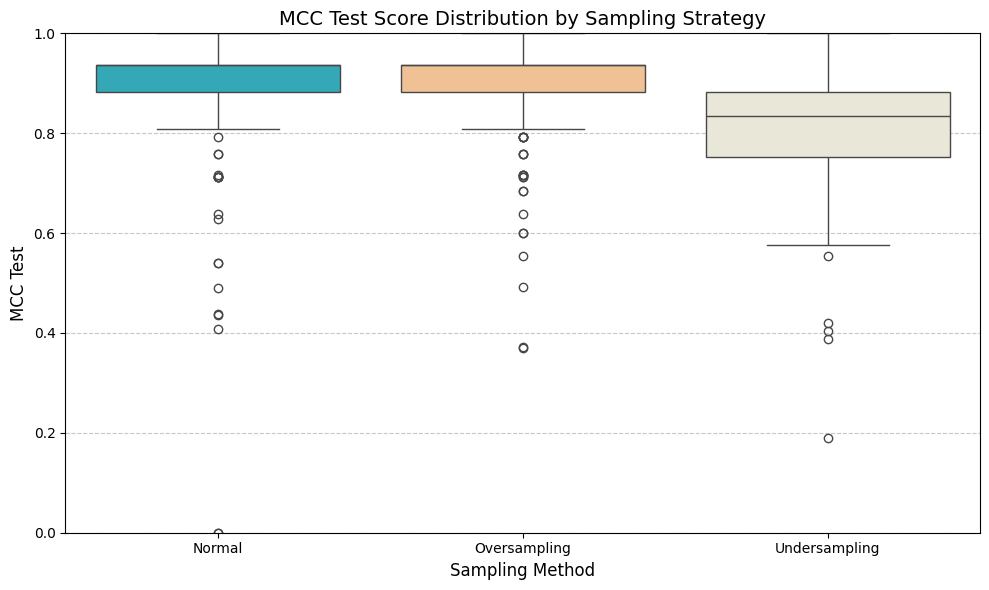

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
normal_df = pd.read_csv("normal_results.csv")
oversample_df = pd.read_csv("oversampling_results.csv")
undersample_df = pd.read_csv("undersampling_results.csv")

# Label sampling strategy
normal_df['Sampling_Method'] = 'Normal'
oversample_df['Sampling_Method'] = 'Oversampling'
undersample_df['Sampling_Method'] = 'Undersampling'

# Combine all datasets
combined_df = pd.concat([normal_df, oversample_df, undersample_df], ignore_index=True)

# Set color palette
color_map = {
    'Normal': '#1FB8CD',        # Strong cyan
    'Oversampling': '#FFC185',  # Light orange
    'Undersampling': '#ECEBD5'  # Light green
}
palette = [color_map[s] for s in combined_df['Sampling_Method'].unique()]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=combined_df,
    x='Sampling_Method',
    y='MCC_test',
    palette=color_map,
    showfliers=True  # set to False if you want to hide outliers
)

plt.title('MCC Test Score Distribution by Sampling Strategy', fontsize=14)
plt.xlabel('Sampling Method', fontsize=12)
plt.ylabel('MCC Test', fontsize=12)
plt.ylim(0, 1)  # adjust based on your data
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure as PNG or TIFF
plt.savefig("mcc_boxplot.png", dpi=300)       # for PNG
# plt.savefig("mcc_boxplot.tiff", dpi=300)    # for TIFF

plt.show()


#Average Performance between Normal and Oversampling Techniques

In [ ]:
import pandas as pd

# Load all results and add a 'Sampling' column
normal = pd.read_csv('normal_results.csv')
normal['Sampling'] = 'Normal'

oversample = pd.read_csv('oversampling_results.csv')
oversample['Sampling'] = 'Oversampling'

undersample = pd.read_csv('undersampling_results.csv')
undersample['Sampling'] = 'Undersampling'

# Combine them
df = pd.concat([normal, oversample, undersample], ignore_index=True)


In [ ]:
# Group by Sampling technique and calculate mean
avg_performance = df.groupby('Sampling')[['Ac_test', 'MCC_test']].mean().reset_index()
print(avg_performance)


        Sampling   Ac_test  MCC_test
0         Normal  0.961465  0.873680
1   Oversampling  0.955474  0.882312
2  Undersampling  0.925245  0.814204


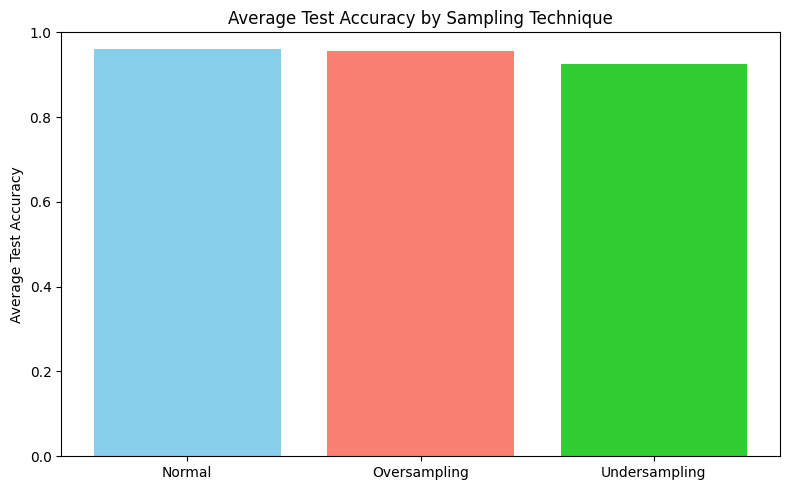

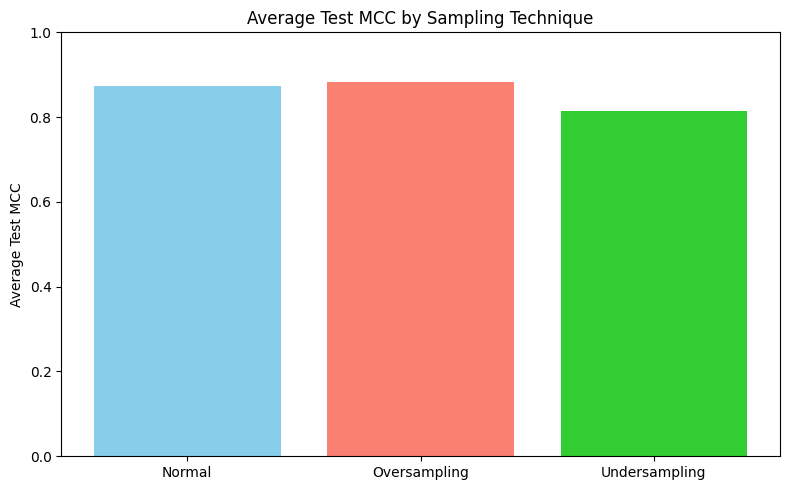

In [ ]:
import matplotlib.pyplot as plt

# Plot Average Accuracy
plt.figure(figsize=(8, 5))
plt.bar(avg_performance['Sampling'], avg_performance['Ac_test'], color=['skyblue', 'salmon', 'limegreen'])
plt.ylabel('Average Test Accuracy')
plt.title('Average Test Accuracy by Sampling Technique')
plt.ylim(0, 1)
plt.tight_layout()

# Save as PNG or TIFF
plt.savefig("average_test_accuracy.png", dpi=300)
# plt.savefig("average_test_accuracy.tiff", dpi=300)

plt.show()

# Plot Average MCC
plt.figure(figsize=(8, 5))
plt.bar(avg_performance['Sampling'], avg_performance['MCC_test'], color=['skyblue', 'salmon', 'limegreen'])
plt.ylabel('Average Test MCC')
plt.title('Average Test MCC by Sampling Technique')
plt.ylim(0, 1)
plt.tight_layout()

# Save as PNG or TIFF
plt.savefig("average_test_mcc.png", dpi=300)
# plt.savefig("average_test_mcc.tiff", dpi=300)

#Performance Delta Heatmap

##Step 1: Load and Prepare Data

In [ ]:
import pandas as pd

# Load your results
normal = pd.read_csv('normal_results.csv')
oversample = pd.read_csv('oversampling_results.csv')  # <-- Replace with your actual file

# Add a key to merge on (Fingerprint + Algorithm)
normal['Key'] = normal['Fingerprint'] + ' | ' + normal['Algorithm']
oversample['Key'] = oversample['Fingerprint'] + ' | ' + oversample['Algorithm']


##Step 2: Merge and Compute Delta
Choose your metric, e.g., MCC_test, Ac_test, or F1_test if available.

In [ ]:
# Merge on the key
merged = pd.merge(
    normal[['Key', 'MCC_test']],
    oversample[['Key', 'MCC_test']],
    on='Key',
    suffixes=('_normal', '_oversample')
)

# Compute the delta (oversample - normal)
merged['Delta'] = merged['MCC_test_oversample'] - merged['MCC_test_normal']

# Split the key back for plotting
merged[['Fingerprint', 'Algorithm']] = merged['Key'].str.split(' \| ', expand=True)


##Step 3: Pivot for Heatmap

In [ ]:
# Create a matrix for the heatmap
heatmap_data = merged.pivot(index='Fingerprint', columns='Algorithm', values='Delta')


##Step 4: Plot the Heatmap

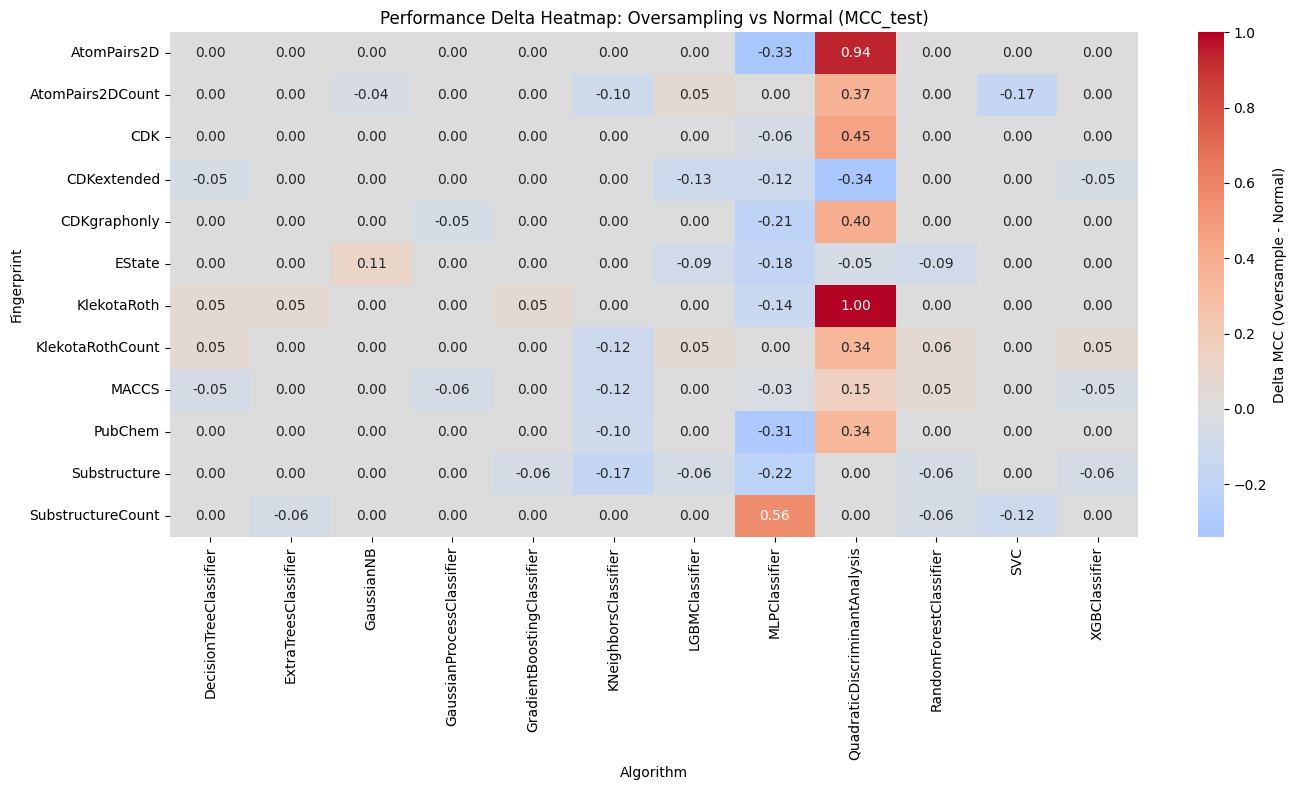

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".2f", cmap="coolwarm", center=0,
    cbar_kws={'label': 'Delta MCC (Oversample - Normal)'}
)
plt.title('Performance Delta Heatmap: Oversampling vs Normal (MCC_test)')
plt.ylabel('Fingerprint')
plt.xlabel('Algorithm')
plt.tight_layout()

# Save the figure
plt.savefig("mcc_delta_heatmap.png", dpi=300)       # for PNG
# plt.savefig("mcc_delta_heatmap.tiff", dpi=300)    # for TIFF (publication-quality)

plt.show()


### 06_Feature importance

#### Select SubstructureCount

In [ ]:
import pandas as pd
!pip install scikit-learn==1.6.1
import pickle

In [ ]:
from zipfile import ZipFile
file_name = "/content/chalcone_oversampling_models_pkl.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting specific file
    print('Extracting all the files now...')
    zip.extract('oversampling_KlekotaRothCount_ExtraTreesClassifier.pkl')
    print('Done!')

File Name                                             Modified             Size
oversampling_AtomPairs2DCount_DecisionTreeClassifier.pkl 2025-06-19 16:14:48         4717
oversampling_AtomPairs2DCount_ExtraTreesClassifier.pkl 2025-06-19 16:17:00       316807
oversampling_AtomPairs2DCount_GaussianNB.pkl   2025-06-19 16:17:30         8840
oversampling_AtomPairs2DCount_GaussianProcessClassifier.pkl 2025-06-19 16:17:16      1221412
oversampling_AtomPairs2DCount_GradientBoostingClassifier.pkl 2025-06-19 16:14:54       128621
oversampling_AtomPairs2DCount_KNeighborsClassifier.pkl 2025-06-19 16:15:22       449157
oversampling_AtomPairs2DCount_LGBMClassifier.pkl 2025-06-19 16:16:48       314672
oversampling_AtomPairs2DCount_MLPClassifier.pkl 2025-06-19 16:15:30       447087
oversampling_AtomPairs2DCount_QuadraticDiscriminantAnalysis.pkl 2025-06-19 16:17:36       452042
oversampling_AtomPairs2DCount_RandomForestClassifier.pkl 2025-06-19 16:15:48       188724
oversampling_AtomPairs2DCount_SVC.pkl

In [ ]:
from zipfile import ZipFile
file_name = "chalcone_oversampling_lowvarianceremoved_datasplit.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting specific file
    print('Extracting all the files now...')
    zip.extract('oversampling_KlekotaRothCount_X_train.csv')
    zip.extract('oversampling_KlekotaRothCount_y_train.csv')
    zip.extract('oversampling_KlekotaRothCount_X_test.csv')
    zip.extract('oversampling_KlekotaRothCount_y_test.csv')
    print('Done!')

File Name                                             Modified             Size
oversampling_results.csv                       2025-06-19 16:23:30        36097
oversampling_AtomPairs2DCount_removed_low_variance_0.1.csv 2025-06-19 16:17:34       185520
oversampling_AtomPairs2DCount_X_test.csv       2025-06-19 16:17:34        39363
oversampling_AtomPairs2DCount_X_train.csv      2025-06-19 16:17:34       148206
oversampling_AtomPairs2DCount_y_test.csv       2025-06-19 16:17:34          108
oversampling_AtomPairs2DCount_y_train.csv      2025-06-19 16:17:34          406
oversampling_AtomPairs2D_removed_low_variance_0.1.csv 2025-06-19 16:17:36        78007
oversampling_AtomPairs2D_X_test.csv            2025-06-19 16:17:36        16807
oversampling_AtomPairs2D_X_train.csv           2025-06-19 16:17:36        62401
oversampling_AtomPairs2D_y_test.csv            2025-06-19 16:17:36          108
oversampling_AtomPairs2D_y_train.csv           2025-06-19 16:17:36          406
oversampling_CDKexten

In [ ]:
import pandas as pd
import pickle
X_train = pd.read_csv('oversampling_KlekotaRothCount_X_train.csv')
y_train = pd.read_csv('oversampling_KlekotaRothCount_y_train.csv')
X_test = pd.read_csv('oversampling_KlekotaRothCount_X_test.csv')
y_test = pd.read_csv('oversampling_KlekotaRothCount_y_test.csv')

load_model = pickle.load(open('oversampling_KlekotaRothCount_ExtraTreesClassifier.pkl', 'rb'))

X_train_pred = load_model.predict(X_train)

In [ ]:
pip install gini

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.1 MB/s eta 0:00:00
  Created wheel for gini: filename=gini-0.7-py3-none-any.whl size=6241 sha256=c7a0fd9a797d94689e388a411f5a0646d307fa803e19fad7053468fe52e31485
  Stored in directory: /root/.cache/pip/wheels/9f/45/57/02fce2dcccc64602a30fc2638ca5b2f3f96ca93bf37a06c564
Successfully built gini


In [ ]:
features = pd.concat([pd.Series(X_train.columns, name='Features'), pd.Series(load_model.feature_importances_, name='Gini')], axis=1 )
features.sort_values(by='Gini', ascending=False, inplace=True)
features

Features      Gini
150  KRFPC3143  0.080821
7     KRFPC161  0.076667
91   KRFPC1787  0.060284
280  KRFPC4080  0.042073
20    KRFPC383  0.036045
..         ...       ...
30    KRFPC608  0.000000
296  KRFPC4500  0.000000
291  KRFPC4295  0.000000
34    KRFPC648  0.000000
2      KRFPC20  0.000000

[324 rows x 2 columns]

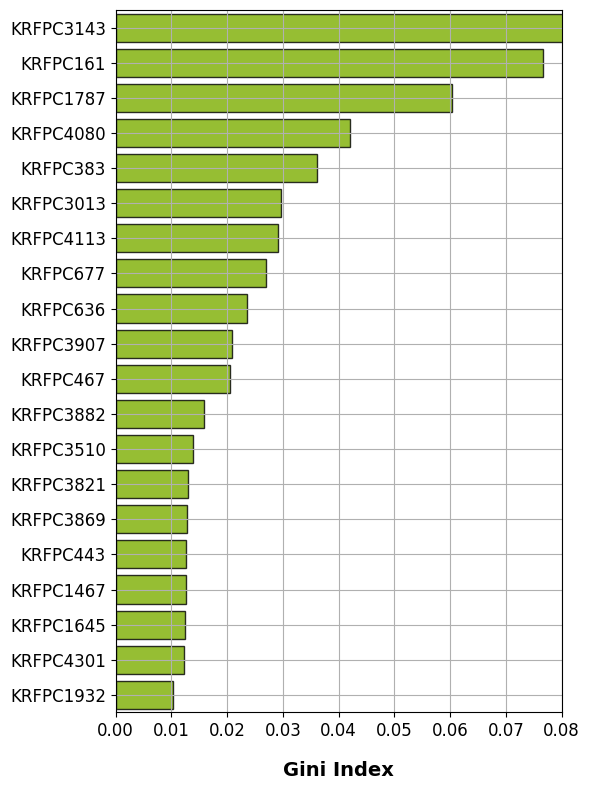

In [ ]:
# Create feature importance plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.barh(features.Features, features.Gini, color='#7CAE00', edgecolor='black', align='center', alpha=0.8)
plt.ylim(-0.5,19.5)
plt.gca().invert_yaxis()
plt.grid(True)

plt.xlabel('Gini Index', fontsize=14, fontweight='bold', labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.08)

plt.margins(0.02)
plt.tight_layout()

plt.savefig('Barplot_feature_importance_oversampling_KlekotaRothCount_ExtraTreesClassifier.tiff')

### 07_PCA analysis

In [ ]:
# PCA modeling
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Data scaling
X_train = scale(X_train)
X_test = scale(X_test)

# Build PCA model
pca = PCA()
pca.fit(X_train)
pca.fit(X_test)

PCA()

In [ ]:
from zipfile import ZipFile
file_name = "PCA_scores"

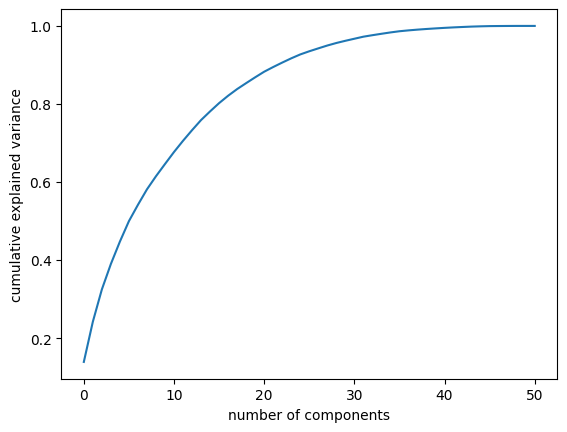

In [ ]:
# Screen plot
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('Screen plot.tiff')

In [ ]:
# Compute PC scores train
scores_train = pca.transform(X_train)
scores_df_train = pd.DataFrame(scores_train)
scores_df_train

0          1          2         3         4         5         6   \
0     7.573337   2.518193   1.808037  3.239163  0.800467 -0.178076  1.715098   
1    -0.879204  -3.005643   0.716916 -2.096602  2.067719  1.226456  2.326162   
2    -2.319649   0.369969  -2.994544  2.461401 -2.893200 -2.503481  0.159504   
3    -2.790442   6.662972  10.441180 -6.149111 -3.800673  1.263673 -4.575813   
4    -1.675927  -1.065127  -1.412591 -0.682038  0.039639 -1.867328  0.982380   
..         ...        ...        ...       ...       ...       ...       ...   
195  -1.818185   1.077467  -1.120441  0.314687 -1.519655 -1.304562 -0.546428   
196  12.558344  10.824095  -6.794512 -1.529992 -1.585174  4.513517 -1.117760   
197  -2.374304   0.266341  -2.843604  0.805669 -2.736280 -3.549443  1.627564   
198  -1.838206   0.529537  -1.863787 -0.549499 -0.782341 -1.787250  1.460364   
199  -2.474128   1.997511   0.580268 -2.809829 -1.760628 -6.471988 -0.127214   

           7         8         9   ...        41        42        43  \
0    2.691489 -0.293339  1.837693  ... -1.767430  0.057944 -0.318304   
1    5.625626 -1.340172  0.477729  ...  0.407547  0.000173 -1.143933   
2   -2.279982 -2.446352 -0.728593  ... -0.290983 -2.128144  0.022869   
3   -0.340499 -3.173514  2.086790  ...  0.085513 -0.140107  0.254084   
4    4.071821  0.171912  0.481265  ...  0.216303  0.815537 -0.050266   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.470534  0.334748  0.651266  ... -0.016851 -0.827842  1.074686   
196  1.178024  0.309118 -0.795402  ... -2.659514  0.381923 -0.132012   
197  2.273183 -0.944713  0.166674  ... -0.393372 -0.810247  1.112173   
198  0.213899  0.495376 -0.916568  ... -0.000221 -0.327633 -0.612084   
199 -2.691377  4.255089  2.686165  ... -0.084225 -0.349891  0.702295   

           44        45        46        47        48        49        50  
0    0.556457 -0.097824  0.496909 -0.515564  0.324419  1.325826 -0.734761  
1    0.552457  0.506320 -0.115459  0.474375  0.292970 -0.287256  0.228504  
2   -0.045879  0.488762  0.009984  0.466681 -0.098068 -0.391459  0.091812  
3    0.254216 -0.057644 -0.199104  0.275043  0.394139  0.322793 -0.021741  
4   -0.547695 -0.368063  1.974012 -2.504553 -0.417022 -0.231748  0.050034  
..        ...       ...       ...       ...       ...       ...       ...  
195  0.713919  0.209313 -1.471351 -0.511976 -0.204979 -0.463175  0.185103  
196 -0.203648  0.022209 -0.117908 -0.027107 -0.103437 -1.036670  0.431432  
197  0.327362 -1.727883 -2.252500  3.046690  0.369323 -0.313876  0.057876  
198  0.424968 -0.329337  0.974901 -0.210561  0.851037 -0.147584  0.462160  
199 -0.097184 -2.097777 -0.307889  1.261216  0.206830 -0.505755 -0.079786  

[200 rows x 51 columns]

In [ ]:
# Compute PC scores test
scores_test = pca.transform(X_test)
scores_df_test = pd.DataFrame(scores_test)
scores_df_test

0          1          2          3          4         5   \
0   -0.290505  11.318174  13.342125  21.995753   6.481818  3.403723   
1   -2.040604  -4.999347  -0.279501   1.037179  -0.242268  4.059036   
2   -2.309759   4.075917   3.003458   6.011543  -0.879339 -0.211667   
3   -2.528162  -0.305990  -1.537425   0.662796  -1.244338 -1.933973   
4   -2.666229  -0.457537  -2.133864   1.197986  -2.612284 -2.032599   
5    1.544440  -4.024575   0.025301  -3.587166  15.797106 -2.963116   
6   -2.432866  -3.063639   2.054006  -4.801169   0.945081  9.823625   
7   30.900993 -17.781295  11.628408   2.169753  -5.234635 -4.892317   
8   -2.050446  -5.157556   0.187765   1.548172  -0.418844  5.729715   
9   -2.999319   0.008513  -3.340161   2.127314  -4.211056 -3.303378   
10   1.228421   1.358978  -0.370955  -2.428054  11.245442 -8.000093   
11  -1.186856  -5.775922   0.872940  -1.648709   6.115318  2.008042   
12  -0.599521  -2.769661   0.931725  -0.852410   3.764538 -3.292960   
13  -3.414224   9.009457  13.909390  -8.989058  -4.484244 -2.921685   
14  -2.382916  -0.378391  -1.814661   0.278215  -1.595415 -3.367528   
15  -1.568028  -3.338628  -0.761889  -0.740289   0.669143  1.091409   
16  -2.823568   4.080461   2.164536  -4.142226   0.214652 -8.816681   
17   9.777945   9.600924  -5.825383  -1.261162  -0.845079  3.420429   
18  -1.866797  -0.213674  -0.909165  -1.104368  -0.463712  1.754388   
19  -1.264915  -0.784892  -1.690107  -1.411747   0.035436  2.579541   
20  -1.428618  -2.036676  -0.817985   2.982274  -1.562638  0.209434   
21  13.597677   7.259835  -4.249184  -1.363674  -1.723693  1.061532   
22  -2.953351   0.417556  -3.225349   3.376655  -4.099206 -2.752125   
23  -2.322359  -0.384881  -1.904079   0.346575  -1.276136 -3.258320   
24   3.888867   4.261559  -1.773137  -1.380125   7.161460 -5.825002   
25  -2.019937  -0.049592  -1.633406   0.066982  -0.987703 -1.895496   
26  -1.807162  -1.533229   0.099891   0.750509  -1.972198  0.761677   
27  -2.197120  -6.147602  -0.863551   1.992376  -0.672658  5.338945   
28  -1.272384  -5.044757  -0.530491  -0.057440   1.643922  3.121128   
29  -0.214627  -1.176033  -2.747182  -1.488127   0.311777  2.836112   
30  -0.777589  -0.447983   0.015340  -1.242226   2.301590  0.415682   
31  -1.682400  -5.250310  -0.508421  -0.530267   1.300035  3.453969   
32  -2.124953  -2.173980  -0.812671   1.992879  -0.352125  0.078796   
33  -2.443937   2.045416   1.266294  -0.465233  -0.657404 -1.776697   
34  -0.584841  -0.635140  -3.133737  -1.647819  -0.077644  3.188814   
35  -2.992356   7.441270  11.247970  -6.508863  -3.437780  0.102992   
36  15.709294  12.834996  -7.850402  -1.620877   0.735640  4.358257   
37  -1.856133  -0.469701  -1.708887   0.150531  -0.358680 -2.183649   
38  -2.872722   4.463465  13.320550  -8.054373  -1.807580  4.952415   
39  -2.957957  -1.158137  -3.020313   2.631778  -4.521997 -2.779114   
40  -2.973211  -0.003655  -3.267007   2.040403  -4.053821 -3.140566   
41  -2.437617  -0.713251  -1.509440   0.636417  -1.479270 -1.984920   
42  -2.929610  -0.827730  -2.557309   2.182044  -4.361655 -2.935995   
43  -2.769763  -1.164099  -2.632132   2.291716  -3.778233 -2.229019   
44  -2.010147  -0.023622  -0.521568  -0.421867  -0.148637 -1.812320   
45  11.697425  10.449379  -6.320737  -1.335629  -0.410645  3.597853   
46  -2.735051  -1.032830  -2.483823   2.164811  -3.559355 -2.290105   
47  -1.587749  -2.330135   0.285599  -1.579268  -0.174191  4.958114   
48  -1.980611  -3.594715  -0.472515  -1.417008   4.170333  2.728965   
49  -1.691514  -5.165575  -0.280089  -0.297610   1.192507  3.872743   
50  -2.296630   1.788838  -0.868772  -0.257896  -0.381331 -2.308012   

           6          7         8         9   ...        41        42  \
0    1.789082  -0.215648  1.582405 -2.347774  ... -0.002815 -0.022074   
1   -4.211505  -1.629364 -1.066327  1.587618  ... -0.046380 -0.095469   
2   -0.350753   0.747157  1.651095  5.768705  ... -0.028775 -0.054865   
3    0.696665   2.293701  

In [ ]:
scores_df_train.to_csv('scores_df_train.csv')
scores_df_test.to_csv('scores_df_test.csv')

In [ ]:
#oversee max min
train_max = scores_df_train.values.max()
train_min = scores_df_train.values.min()
test_max = scores_df_test.values.max()
test_min = scores_df_test.values.min()
print(train_max,train_min)
print(test_max,test_min)

27.047515647248993 -16.336609899605495
30.900992920210715 -17.781295496025148


<Figure size 2500x2500 with 0 Axes>

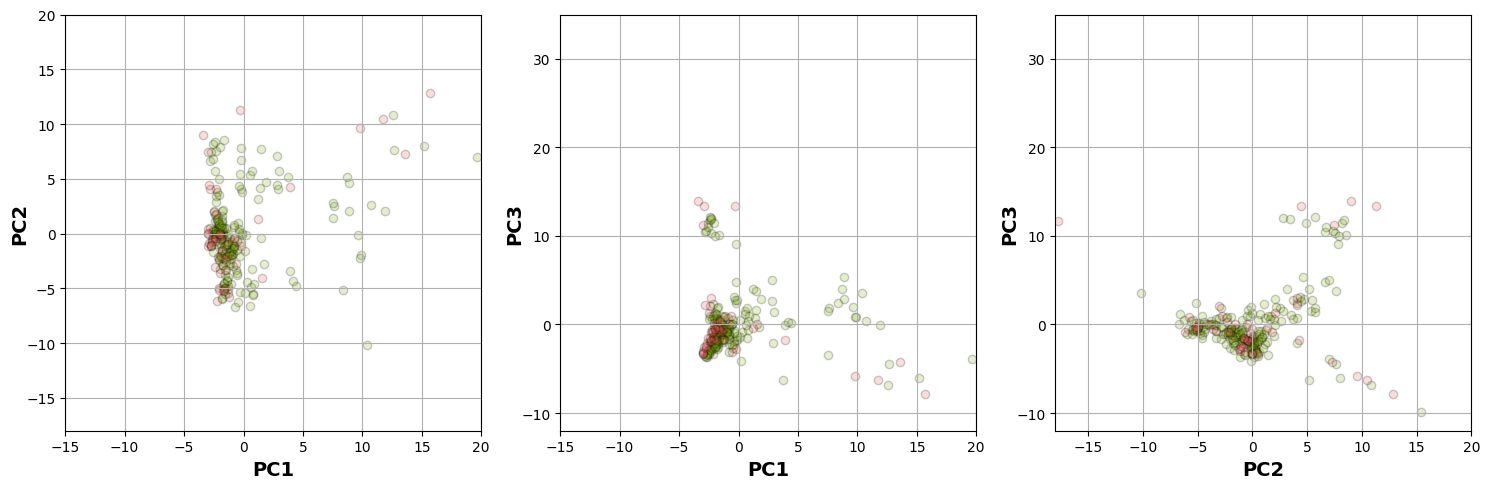

In [ ]:
# PCA scores plot
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# PC1 vs PC2
ax1.scatter(x=scores_df_train[0], y=scores_df_train[1], c="#7CAE00", alpha=0.2, edgecolor='black', label='train') #green
ax1.scatter(x=scores_df_test[0], y=scores_df_test[1], c="#f25555", alpha=0.2, edgecolor='black', label='test') #red

# PC1 vs PC3
ax2.scatter(x=scores_df_train[0], y=scores_df_train[2], c="#7CAE00", alpha=0.2, edgecolor='black', label='train')
ax2.scatter(x=scores_df_test[0], y=scores_df_test[2], c="#f25555", alpha=0.2, edgecolor='black', label='test')

# PC2 vs PC3
ax3.scatter(x=scores_df_train[1], y=scores_df_train[2], c="#7CAE00", alpha=0.2, edgecolor='black', label='train')
ax3.scatter(x=scores_df_test[1], y=scores_df_test[2], c="#f25555", alpha=0.2, edgecolor='black', label='test')

# X tick limits
ax1.set_xlim(-15, 20)
ax2.set_xlim(-15, 20)
ax3.set_xlim(-18, 20)

# Y tick labels
ax1.set_ylim(-18, 20)
ax2.set_ylim(-12, 35)
ax3.set_ylim(-12, 35)

# Axes labels
ax1.set_xlabel('PC1', fontsize=14, fontweight='bold')
ax1.set_ylabel('PC2', fontsize=14, fontweight='bold', labelpad = -2)
ax1.grid()

ax2.set_xlabel('PC1', fontsize=14, fontweight='bold')
ax2.set_ylabel('PC3', fontsize=14, fontweight='bold', labelpad = -2)
ax2.grid()

ax3.set_xlabel('PC2', fontsize=14, fontweight='bold')
ax3.set_ylabel('PC3', fontsize=14, fontweight='bold', labelpad = -2)
ax3.grid()

fig.set_size_inches(15, 5)

fig.tight_layout()

plt.savefig('PCA_scores.tiff')